## Home Credit Default Risk
Can you predict how capable each applicant is of repaying a loan?

### Welcome note from Home Credit

Dear Kagglers,

On behalf of Home Credit and our R&D team I would like to officially welcome you to the “Home Credit Default Risk” competition!

The competition is about predicting future payment behavior of clients from application, demographic and historical credit behavior data. We have provided the data in the raw form (instead of aggregations of time variant data on loan level we provided the underlying data needed for such aggregation) as we are keen to not only see what modelling approaches will the Kaggle community use but also how will the community work with the data in such form. Will the best solution be complete black-box with only minimal feature engineering/learning? Or will some smart feature engineering/learning help “crack the case”? To help you create some interesting features we have prepared file with description of every column (please refer to “HomeCreditcolumnsdescription.csv” file in the data section).

Please feel free to ask us any questions regarding the data, competition, R&D team or our company.

If you enjoy applying your analytical skills, programing in Python and traveling or are thinking of starting new adventure in one of the very dynamic and exciting Asian markets please do not hesitate to send short email with your CV to careers@homecredit.eu.

Currently we are present in China, India, Indonesia, Vietnam, Philippines, Russia, Kazakhstan, USA, Czech Republic and Slovakia.

We hope you will have fun with the competition!

### More domain knowledge from former Home Credit analyst

https://www.kaggle.com/c/home-credit-default-risk/discussion/63032#latest-530699

<h1 style='color:#32c3ff'><b>EDA - Exploratory Data Analysis</h1>

#### Imports

In [1]:
#imports
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#stats stat
import scipy.stats as stats

#### Reading data

In [2]:
app_train = pd.read_csv('./db/application_train.csv')

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train.shape

(307511, 122)

In [5]:
for col in app_train.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [6]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(app_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Verificar variancia das colunas?Colunas com baixa variancia podem ser possivelmente descartadas

In [9]:
# Set the style of plots
plt.style.use('ggplot')

<h2 style='color:#32c3ff'><b>TARGET</h2>
    
Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [10]:
app_train['TARGET'].isnull().sum()

0

In [11]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [12]:
round((1-(app_train[app_train['TARGET'] == 0].count()['TARGET'])/(len(app_train['TARGET'])))*100,2)

8.07

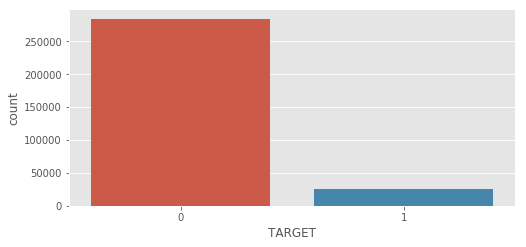

In [13]:
plt.figure(figsize=(8,0.45*8))
sns.countplot(app_train['TARGET'])
sns.despine();

### Variavel target altamente desbalanceada

<h2 style='color:#32c3ff'><b>NAME_CONTRACT_TYPE</h2>
    
Identification if loan is cash or revolving

In [14]:
app_train['NAME_CONTRACT_TYPE'].isnull().sum()

0

In [15]:
app_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

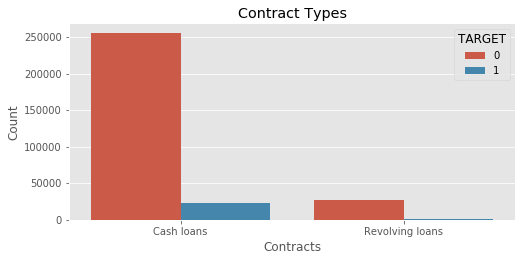

In [16]:
plt.figure(figsize=(8,0.45*8))
sns.countplot(app_train['NAME_CONTRACT_TYPE'], hue=app_train['TARGET'])
plt.xlabel('Contracts'); plt.ylabel('Count'); plt.title('Contract Types')
sns.despine();

In [17]:
contract_type = app_train['NAME_CONTRACT_TYPE'].unique()
contract_type_default = []

for i in contract_type:
    contract_type_default.append((app_train[app_train['NAME_CONTRACT_TYPE'] == i]['TARGET'].mean())*100)

for i, j in zip(contract_type, contract_type_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are Cash loans default on 8.35% of loans
Clients whose are Revolving loans default on 5.48% of loans


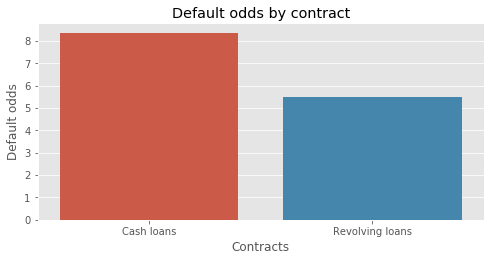

In [18]:
contract_type = pd.DataFrame(data=contract_type_default, index=contract_type, columns=['Default odds'])
plt.figure(figsize=(8,0.45*8))
sns.barplot(x=contract_type.index, y=contract_type['Default odds'])
plt.xlabel('Contracts'); plt.ylabel('Default odds'); plt.title('Default odds by contract')
sns.despine();

<h2 style='color:#32c3ff'><b>CODE_GENDER</h2>
    
Gender of the client

In [19]:
app_train['NAME_CONTRACT_TYPE'].isnull().sum()

0

In [20]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
app_train[app_train['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


XNA/XAP denote NA values. As has been asked in another topic, value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values.

In [22]:
app_train = app_train.replace('XNA', np.nan)

In [23]:
app_train.dropna(subset=['CODE_GENDER'], inplace=True)

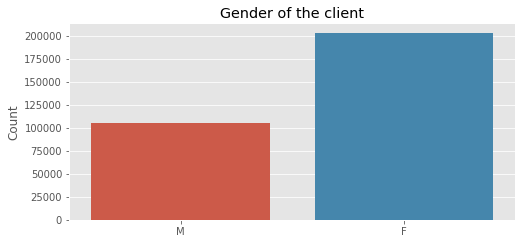

In [24]:
plt.figure(figsize=(8,0.45*8))
sns.countplot(app_train['CODE_GENDER'])
plt.xlabel(''); plt.ylabel('Count'); plt.title('Gender of the client')
sns.despine();

In [25]:
code_gender = app_train['CODE_GENDER'].unique()
code_gender_default = []

for i in code_gender:
    code_gender_default.append((app_train[app_train['CODE_GENDER'] == i]['TARGET'].mean())*100)

for i, j in zip(code_gender, code_gender_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are M default on 10.14% of loans
Clients whose are F default on 7.00% of loans


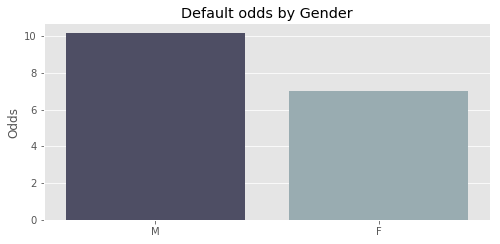

In [26]:
code_gender = pd.DataFrame(data=code_gender_default, index=code_gender, columns=['Default odds'])
plt.figure(figsize=(8,0.45*8))
sns.barplot(x=code_gender.index, y=code_gender['Default odds'], palette='bone')
plt.xlabel(''); plt.ylabel('Odds'); plt.title('Default odds by Gender')
sns.despine();

<h2 style='color:#32c3ff'><b>FLAG_OWN_CAR</h2>
    
Flag if the client owns a car

In [27]:
app_train['FLAG_OWN_CAR'].isnull().sum()

0

In [28]:
app_train['FLAG_OWN_CAR'].value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

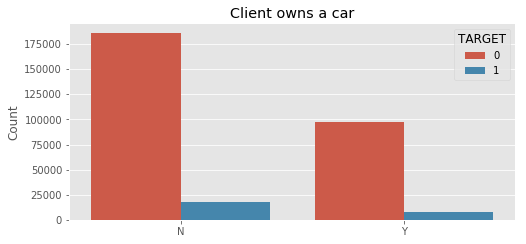

In [29]:
plt.figure(figsize=(8,0.45*8))
sns.countplot(app_train['FLAG_OWN_CAR'], hue=app_train['TARGET'])
plt.xlabel(''); plt.ylabel('Count'); plt.title('Client owns a car')
sns.despine();

In [30]:
own_car = app_train['FLAG_OWN_CAR'].unique()
own_car_default = []

for i in own_car:
    own_car_default.append((app_train[app_train['FLAG_OWN_CAR'] == i]['TARGET'].mean())*100)

for i, j in zip(own_car, own_car_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are N default on 8.50% of loans
Clients whose are Y default on 7.24% of loans


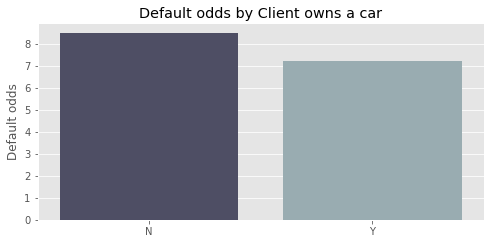

In [31]:
own_car = pd.DataFrame(data=own_car_default, index=own_car, columns=['Default odds'])
plt.figure(figsize=(8,0.45*8))
sns.barplot(x=own_car.index, y=own_car['Default odds'], palette='bone')
plt.xlabel(''); plt.ylabel('Default odds'); plt.title('Default odds by Client owns a car')
sns.despine();

<h2 style='color:#32c3ff'><b>FLAG_OWN_REALTY</h2>
    
Flag if client owns a house or flat

In [32]:
app_train['FLAG_OWN_REALTY'].isnull().sum()

0

In [33]:
app_train['FLAG_OWN_REALTY'].value_counts()

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

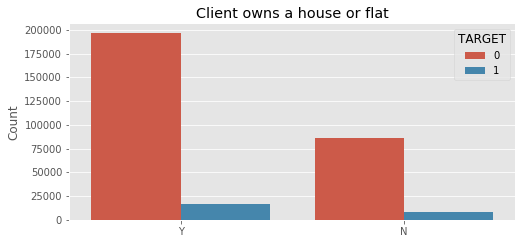

In [34]:
plt.figure(figsize=(8,0.45*8))
sns.countplot(app_train['FLAG_OWN_REALTY'], hue=app_train['TARGET'])
plt.xlabel(''); plt.ylabel('Count'); plt.title('Client owns a house or flat')
sns.despine();

In [35]:
own_realty = app_train['FLAG_OWN_REALTY'].unique()
own_realty_default = []

for i in own_realty:
    own_realty_default.append((app_train[app_train['FLAG_OWN_REALTY'] == i]['TARGET'].mean())*100)

for i, j in zip(own_realty, own_realty_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are Y default on 7.96% of loans
Clients whose are N default on 8.32% of loans


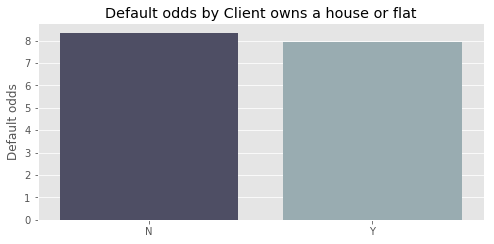

In [36]:
own_realty = pd.DataFrame(data=own_realty_default, index=own_realty, columns=['Default odds'])
plt.figure(figsize=(8,0.45*8))
sns.barplot(x=own_realty.index, y=own_realty['Default odds'], order=['N','Y'], palette='bone')
plt.xlabel(''); plt.ylabel('Default odds'); plt.title('Default odds by Client owns a house or flat')
sns.despine();

<h2 style='color:#32c3ff'><b>CNT_CHILDREN</h2>
    
Number of children the client has

In [37]:
app_train['CNT_CHILDREN'].isnull().sum()

0

In [38]:
app_train['CNT_CHILDREN'].mean()

0.4170474168067719

In [39]:
app_train['CNT_CHILDREN'].mean()

0.4170474168067719

In [40]:
app_train['CNT_CHILDREN'].value_counts()

0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

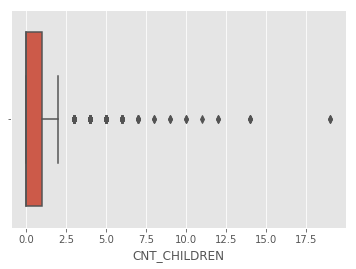

In [41]:
sns.boxplot(app_train['CNT_CHILDREN']);

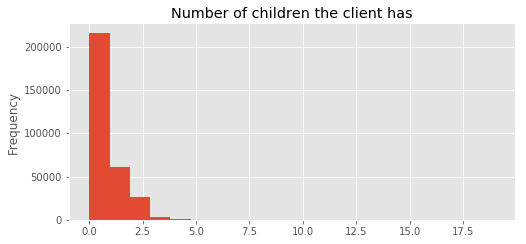

In [42]:
plt.figure(figsize=(8,0.45*8))
app_train['CNT_CHILDREN'].plot.hist(bins=20)
plt.title('Number of children the client has')
sns.despine();

In [43]:
app_train['CNT_CHILDREN'].corr(app_train['TARGET'])

0.01918911294753713

In [44]:
children = app_train['CNT_CHILDREN'].unique()
children_default = []

for i in children:
    children_default.append((app_train[app_train['CNT_CHILDREN'] == i]['TARGET'].mean())*100)

for i, j in zip(children, children_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 0 default on 7.71% of loans
Clients whose are 1 default on 8.92% of loans
Clients whose are 2 default on 8.72% of loans
Clients whose are 3 default on 9.63% of loans
Clients whose are 4 default on 12.82% of loans
Clients whose are 7 default on 0.00% of loans
Clients whose are 5 default on 8.33% of loans
Clients whose are 6 default on 28.57% of loans
Clients whose are 8 default on 0.00% of loans
Clients whose are 9 default on 100.00% of loans
Clients whose are 11 default on 100.00% of loans
Clients whose are 12 default on 0.00% of loans
Clients whose are 10 default on 0.00% of loans
Clients whose are 19 default on 0.00% of loans
Clients whose are 14 default on 0.00% of loans


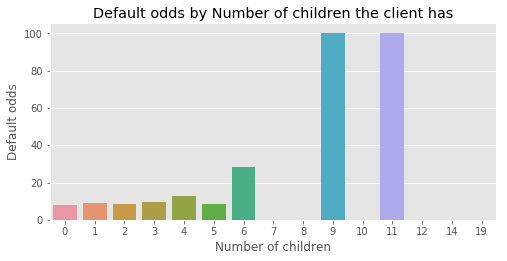

In [45]:
children_odds = pd.DataFrame(data=children_default, index=children, columns=['Default odds'])
plt.figure(figsize=(8,0.45*8))
sns.barplot(x=children_odds.index, y=children_odds['Default odds'])
plt.xlabel('Number of children'); plt.ylabel('Default odds'); plt.title('Default odds by Number of children the client has')
sns.despine();

<h2 style='color:#32c3ff'><b>AMT_INCOME_TOTAL</h2>
    
Income of the client

In [46]:
app_train['AMT_INCOME_TOTAL'].isnull().sum()

0

In [47]:
round(app_train['AMT_INCOME_TOTAL'].mean(),0)

168798.0

In [48]:
app_train['AMT_INCOME_TOTAL'].median()

147150.0

In [49]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [50]:
app_train['AMT_INCOME_TOTAL'].max()

117000000.0

In [453]:
app_train.drop(app_train['AMT_INCOME_TOTAL'].idxmax(), inplace=True)

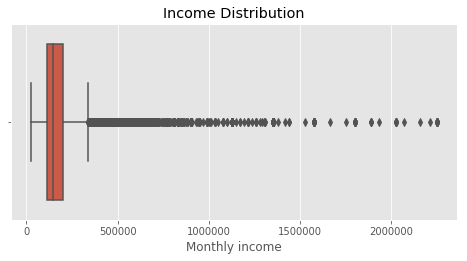

In [466]:
plt.figure(figsize=(8,0.45*8))
sns.boxplot(app_train['AMT_INCOME_TOTAL'], orient='h')
plt.title('Income Distribution');plt.xlabel('Monthly income');

In [52]:
app_train['AMT_INCOME_TOTAL'].sort_values(ascending=False).head(10)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
287463      4500000.0
187833      4500000.0
204564      4500000.0
103006      4500000.0
181698      3950059.5
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
app_train[app_train['AMT_INCOME_TOTAL'] > 6700000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#Finding outliers - IQR Score
q1 = app_train['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = app_train['AMT_INCOME_TOTAL'].quantile(0.75)
iqr = q3 - q1
print(iqr)

90000.0


In [55]:
income_outliers = app_train[(app_train['AMT_INCOME_TOTAL'] < (q1 - 1.5 * iqr))|(app_train['AMT_INCOME_TOTAL'] > (q3 + 1.5 * iqr))].index

In [56]:
# % outliers of total
len(income_outliers)/len(app_train['AMT_INCOME_TOTAL'])

0.045641237435245376

In [57]:
#Droping the income outlier
#app_train.drop(income_outliers, axis =0, inplace=True)

In [58]:
app_train['AMT_INCOME_TOTAL'].median()

147150.0

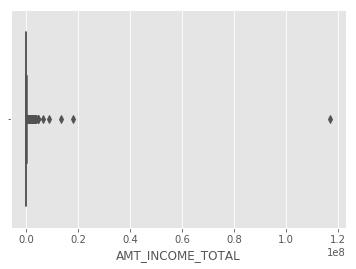

In [59]:
sns.boxplot(app_train['AMT_INCOME_TOTAL'], orient='h');

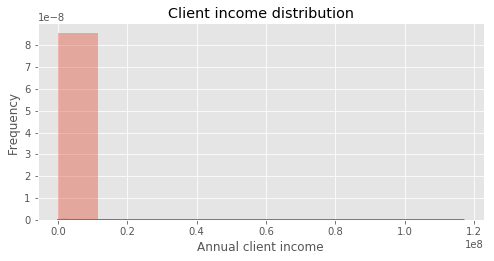

In [60]:
plt.figure(figsize=(8,0.45*8))
sns.distplot(app_train['AMT_INCOME_TOTAL'],bins=10)
plt.xlabel('Annual client income'); plt.ylabel('Frequency'); plt.title('Client income distribution')
sns.despine();

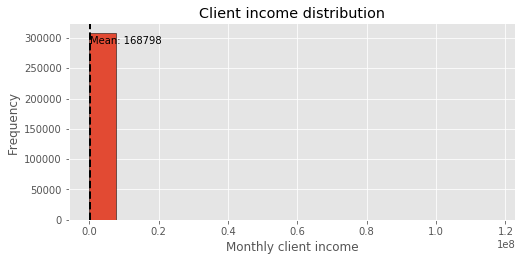

In [61]:
plt.figure(figsize=(8,0.45*8))
app_train['AMT_INCOME_TOTAL'].plot.hist(edgecolor='k', bins=15)
plt.xlabel('Monthly client income'); plt.ylabel('Frequency'); plt.title('Client income distribution')
plt.axvline(app_train['AMT_INCOME_TOTAL'].mean(), color='k', linestyle='dashed', linewidth=2)
sns.despine()

_, max_ = plt.ylim()
plt.text(app_train['AMT_INCOME_TOTAL'].mean() + app_train['AMT_INCOME_TOTAL'].mean()/10, 
         max_ - max_/10, 
         'Mean: {:.0f}'.format(app_train['AMT_INCOME_TOTAL'].mean()));

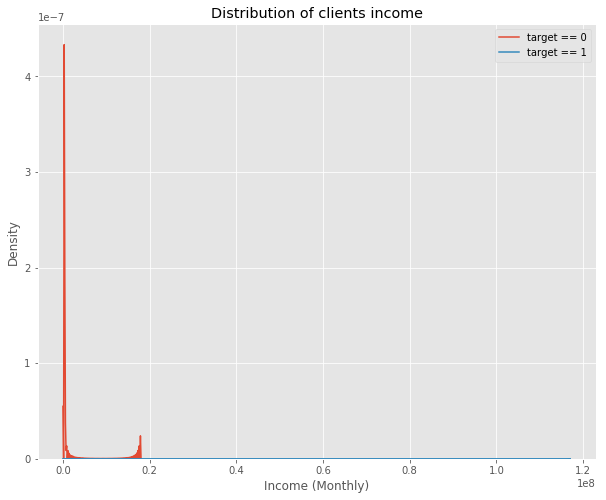

In [62]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_INCOME_TOTAL'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_INCOME_TOTAL'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Income (Monthly)'); plt.ylabel('Density'); plt.title('Distribution of clients income');

<h2 style='color:#32c3ff'><b>AMT_CREDIT</h2>
    
Credit amount of the loan

In [63]:
app_train['AMT_CREDIT'].isnull().sum()

0

In [64]:
round(app_train['AMT_CREDIT'].mean(),0)

599029.0

In [65]:
app_train['AMT_CREDIT'].describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [66]:
#Finding outliers - IQR Score
q1 = app_train['AMT_CREDIT'].quantile(0.25)
q3 = app_train['AMT_CREDIT'].quantile(0.75)
iqr = q3 - q1
print(iqr)

538650.0


In [67]:
credit_outliers = app_train[(app_train['AMT_CREDIT'] < (q1 - 1.5 * iqr))|(app_train['AMT_CREDIT'] > (q3 + 1.5 * iqr))].index

In [68]:
# % outliers of total
len(income_outliers)/len(app_train['AMT_CREDIT'])

0.045641237435245376

In [69]:
#Droping the income outlier
#app_train.drop(credit_outliers, axis =0, inplace=True)

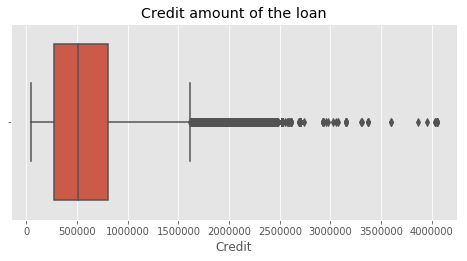

In [465]:
plt.figure(figsize=(8,0.45*8))
sns.boxplot(app_train['AMT_CREDIT'])
plt.title('Credit amount of the loan');plt.xlabel('Credit');

In [71]:
app_train['AMT_CREDIT'].median()

513531.0

In [72]:
app_train['AMT_CREDIT'].corr(app_train['TARGET'])

-0.030371275752896967

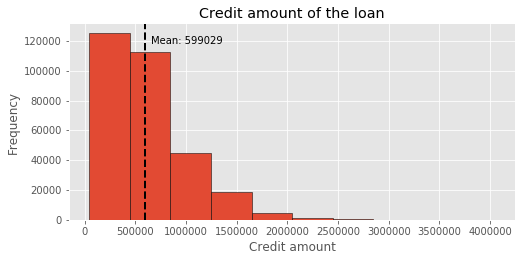

In [73]:
plt.figure(figsize=(8,0.45*8))
app_train['AMT_CREDIT'].plot.hist(edgecolor='k', bins=10)
plt.xlabel('Credit amount'); plt.ylabel('Frequency'); plt.title('Credit amount of the loan')
plt.axvline(app_train['AMT_CREDIT'].mean(), color='k', linestyle='dashed', linewidth=2)
sns.despine()

_, max_ = plt.ylim()
plt.text(app_train['AMT_CREDIT'].mean() + app_train['AMT_CREDIT'].mean()/10, 
         max_ - max_/10, 
         'Mean: {:.0f}'.format(app_train['AMT_CREDIT'].mean()));

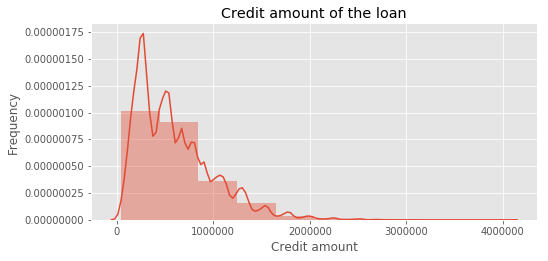

In [74]:
plt.figure(figsize=(8,0.45*8))
sns.distplot(app_train['AMT_CREDIT'], bins=10)
plt.xlabel('Credit amount'); plt.ylabel('Frequency'); plt.title('Credit amount of the loan')
sns.despine();

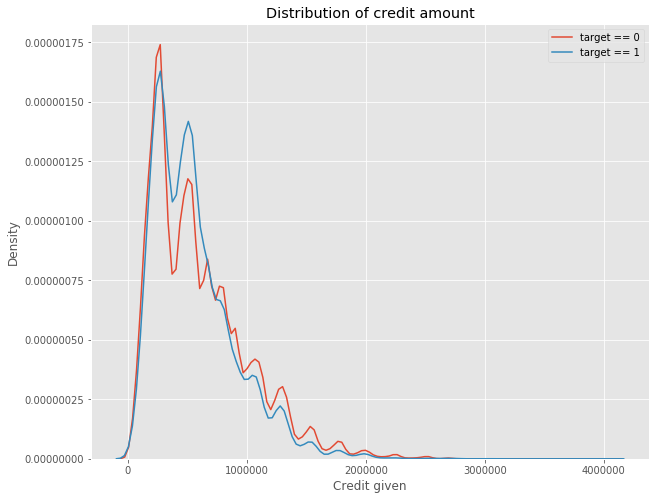

In [75]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Credit given'); plt.ylabel('Density'); plt.title('Distribution of credit amount');

<h2 style='color:#32c3ff'><b>AMT_ANNUITY</h2>
    
Loan annuity

In [76]:
app_train['AMT_ANNUITY'].isnull().sum()

12

In [77]:
app_train[app_train['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [78]:
app_train['AMT_ANNUITY'].corr(app_train['AMT_CREDIT'])

0.7701370797109656

High correlation between both variables. Drop column?

In [79]:
app_train.drop('AMT_ANNUITY', axis=1, inplace=True)

<h2 style='color:#32c3ff'><b>AMT_GOODS_PRICE</h2>
    
For consumer loans it is the price of the goods for which the loan is given

In [80]:
app_train['AMT_GOODS_PRICE'].isnull().sum()

278

In [81]:
app_train['AMT_GOODS_PRICE'].mean()

538397.7244888991

In [82]:
drop_nulls = app_train[app_train['AMT_GOODS_PRICE'].isnull()].index
app_train['AMT_GOODS_PRICE'].drop(drop_nulls, axis=0, inplace=True)

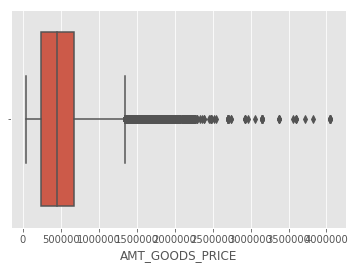

In [83]:
sns.boxplot(app_train['AMT_GOODS_PRICE']);

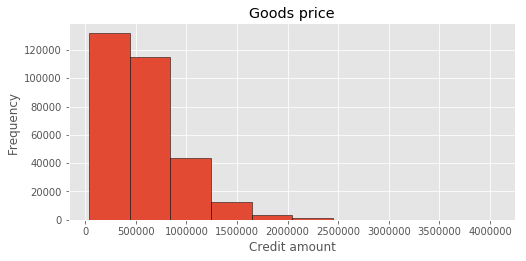

In [84]:
plt.figure(figsize=(8,0.45*8))
app_train['AMT_GOODS_PRICE'].plot.hist(edgecolor='k', bins=10)
plt.xlabel('Credit amount'); plt.ylabel('Frequency'); plt.title('Goods price')
sns.despine();

<h2 style='color:#32c3ff'><b>NAME_TYPE_SUITE</h2>
    
    Who was accompanying client when he was applying for the loan


In [85]:
app_train['NAME_TYPE_SUITE'].isnull().sum()

1292

In [86]:
types = app_train['NAME_TYPE_SUITE'].unique()

In [87]:
len(app_train['NAME_TYPE_SUITE'].unique())

8

In [88]:
suite_mean = []

for i in types:
    suite_mean.append((app_train[app_train['NAME_TYPE_SUITE'] == i]['TARGET'].mean())*100)

In [89]:
types

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [90]:
suite_mean

[8.183146026725897,
 7.494769353392448,
 7.871591908531222,
 7.376798285889195,
 8.775981524249422,
 nan,
 9.830508474576272,
 8.487084870848708]

<h2 style='color:#32c3ff'><b>NAME_INCOME_TYPE</h2>
    
    Clients income type (businessman, working, maternity leave,…)

In [91]:
app_train['NAME_INCOME_TYPE'].isnull().sum()

0

In [92]:
income_types = app_train['NAME_INCOME_TYPE'].unique()

In [93]:
app_train['NAME_INCOME_TYPE'].value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

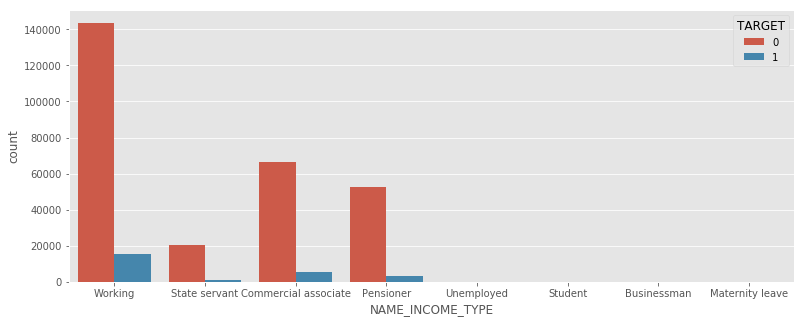

In [94]:
plt.figure(figsize=(13,5))
sns.countplot(app_train['NAME_INCOME_TYPE'],hue=app_train['TARGET']);

In [95]:
income_type_default = []

for i in income_types:
    income_type_default.append((app_train[app_train['NAME_INCOME_TYPE'] == i]['TARGET'].mean())*100)

for i, j in zip(income_types, income_type_default):
    print("Clients whose have income type %s default on %0.2f%% of loans" % (i,j))

Clients whose have income type Working default on 9.59% of loans
Clients whose have income type State servant default on 5.75% of loans
Clients whose have income type Commercial associate default on 7.48% of loans
Clients whose have income type Pensioner default on 5.39% of loans
Clients whose have income type Unemployed default on 36.36% of loans
Clients whose have income type Student default on 0.00% of loans
Clients whose have income type Businessman default on 0.00% of loans
Clients whose have income type Maternity leave default on 40.00% of loans


<h2 style='color:#32c3ff'><b>NAME_EDUCATION_TYPE</h2>
    
    Level of highest education the client achieved

In [96]:
app_train['NAME_EDUCATION_TYPE'].isnull().sum()

0

In [97]:
education_types = app_train['NAME_EDUCATION_TYPE'].unique()
print(education_types)

['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [98]:
app_train['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

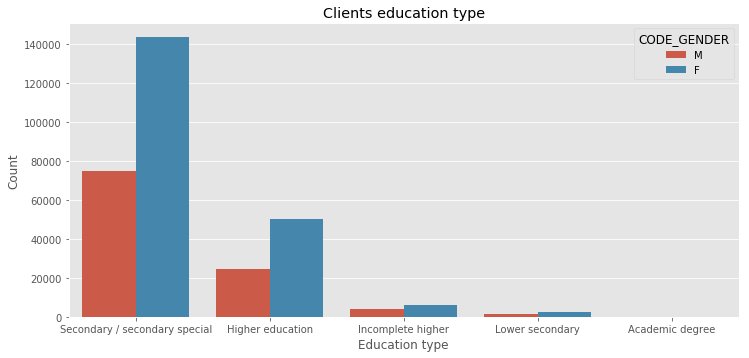

In [99]:
plt.figure(figsize=(12,0.45*12))
sns.countplot(app_train['NAME_EDUCATION_TYPE'], hue=app_train['CODE_GENDER'])
plt.title("Clients education type")
plt.xlabel('Education type'), plt.ylabel('Count');

In [100]:
education_type_default = []

for i in education_types:
    education_type_default.append((app_train[app_train['NAME_EDUCATION_TYPE'] == i]['TARGET'].mean())*100)

for i, j in zip(education_types, education_type_default):
    print("Clients whose have type %s default on %0.2f%% of loans" % (i,j))

Clients whose have type Secondary / secondary special default on 8.94% of loans
Clients whose have type Higher education default on 5.36% of loans
Clients whose have type Incomplete higher default on 8.49% of loans
Clients whose have type Lower secondary default on 10.93% of loans
Clients whose have type Academic degree default on 1.83% of loans


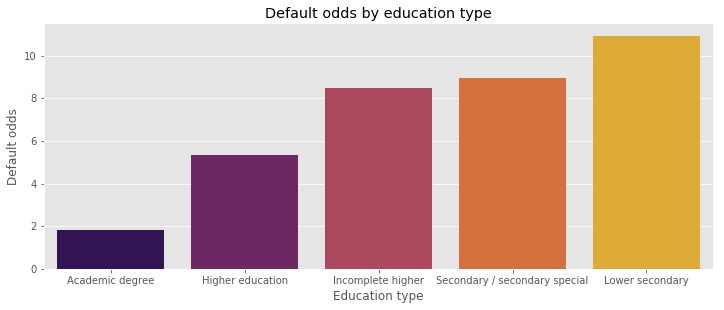

In [101]:
education_odds = pd.DataFrame(data=education_type_default, index=education_types, columns=['Default odds'])
plt.figure(figsize=(12,0.45*10))
sns.barplot(x=education_odds.index, y=education_odds['Default odds'], order=['Academic degree', 'Higher education',
                                                                            'Incomplete higher', 
                                                                             'Secondary / secondary special', 'Lower secondary'],
           palette='inferno')
plt.xlabel('Education type'); plt.ylabel('Default odds'); plt.title('Default odds by education type')
sns.despine();

<h2 style='color:#32c3ff'><b>NAME_FAMILY_STATUS</h2>
    
    Family status of the client

In [102]:
app_train['NAME_FAMILY_STATUS'].isnull().sum()

0

In [103]:
family_status = app_train['NAME_FAMILY_STATUS'].unique()
print(family_status)

['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']


In [104]:
app_train['NAME_FAMILY_STATUS'].value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [105]:
drop_family_status = app_train[app_train['NAME_FAMILY_STATUS'] == 'Unknown'].index
app_train.drop(drop_family_status, axis=0,inplace=True)

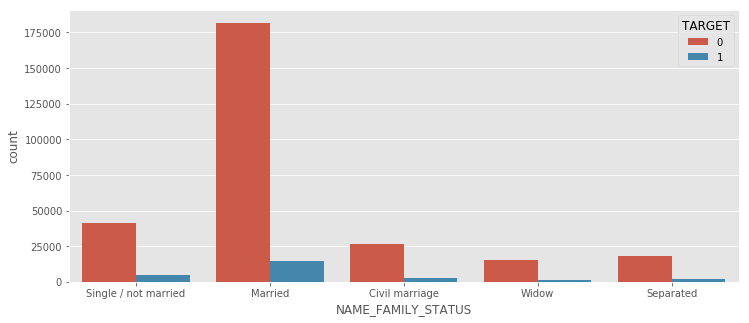

In [106]:
plt.figure(figsize=(12,5))
sns.countplot(app_train['NAME_FAMILY_STATUS'], hue=app_train['TARGET']);

In [107]:
family_type_default = []

for i in family_status:
    family_type_default.append((app_train[app_train['NAME_FAMILY_STATUS'] == i]['TARGET'].mean())*100)

for i, j in zip(family_status, family_type_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are Single / not married default on 9.81% of loans
Clients whose are Married default on 7.56% of loans
Clients whose are Civil marriage default on 9.94% of loans
Clients whose are Widow default on 5.82% of loans
Clients whose are Separated default on 8.19% of loans
Clients whose are Unknown default on nan% of loans


<h2 style='color:#32c3ff'><b>NAME_HOUSING_TYPE</h2>

What is the housing situation of the client (renting, living with parents, ...)

In [108]:
app_train['NAME_HOUSING_TYPE'].isnull().sum()

0

In [109]:
housing_type = app_train['NAME_HOUSING_TYPE'].unique()
print(housing_type)

['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [110]:
app_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272864
With parents            14840
Municipal apartment     11181
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

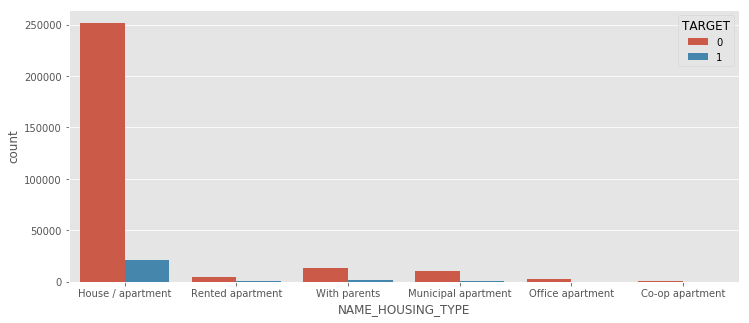

In [111]:
plt.figure(figsize=(12,5))
sns.countplot(app_train['NAME_HOUSING_TYPE'], hue=app_train['TARGET']);

In [112]:
housing_type_default = []

for i in housing_type:
    housing_type_default.append((app_train[app_train['NAME_HOUSING_TYPE'] == i]['TARGET'].mean())*100)

for i, j in zip(housing_type, housing_type_default):
    print("Clients whose have %s default on %0.2f%% of loans" % (i,j))

Clients whose have House / apartment default on 7.80% of loans
Clients whose have Rented apartment default on 12.31% of loans
Clients whose have With parents default on 11.70% of loans
Clients whose have Municipal apartment default on 8.54% of loans
Clients whose have Office apartment default on 6.57% of loans
Clients whose have Co-op apartment default on 7.93% of loans


<h2 style='color:#32c3ff'><b>REGION_POPULATION_RELATIVE</h2>
    
    Normalized population of region where client lives (higher number means the client lives in more populated region)

In [113]:
app_train['REGION_POPULATION_RELATIVE'].isnull().sum()

0

In [114]:
region_pop = app_train['REGION_POPULATION_RELATIVE'].unique()
print(region_pop)

[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006 0.020713 0.010966
 0.04622  0.025164 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575
 0.01885  0.006207 0.009175 0.007305 0.007114 0.009334 0.022625 0.01452
 0.006629 0.00733  0.032561 0.00496  0.072508 0.009657 0.02461  0.003069
 0.020246 0.018209 0.009549 0.007274 0.002134 0.010276 0.003813 0.003818
 0.00712  0.0105   0.010147 0.010643 0.008866 0.00702  0.002506 0.005313
 0.006233 0.008474 0.005144 0.011657 0.008625 0.014464 0.004849 0.006008
 0.00963  0.005002 0.006852 0.011703 0.006305 0.010556 0.00823  0.006671
 0.002042 0.005084 0.008068 0.001333 0.001417 0.001276 0.000938 0.000533
 0.00029 ]


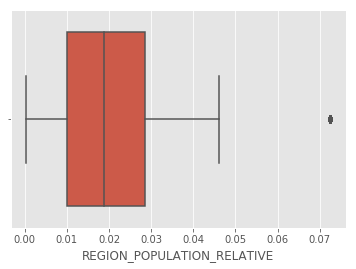

In [115]:
sns.boxplot(app_train['REGION_POPULATION_RELATIVE']);

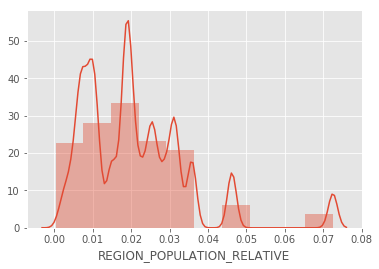

In [116]:
sns.distplot(app_train['REGION_POPULATION_RELATIVE'], bins=10);

In [117]:
app_train['REGION_POPULATION_RELATIVE'].corr(app_train['TARGET'])

-0.037224586618141306

<h2 style='color:#32c3ff'><b>DAYS_BIRTH</h2>
    
    Client's age in days at the time of application


In [118]:
app_train['DAYS_BIRTH'].isnull().sum()

0

In [119]:
app_train['DAYS_BIRTH'].describe()

count    307505.000000
mean     -16037.049495
std        4363.987877
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [120]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

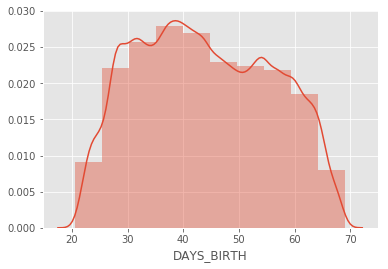

In [121]:
sns.distplot(app_train['DAYS_BIRTH']/365,bins=10);

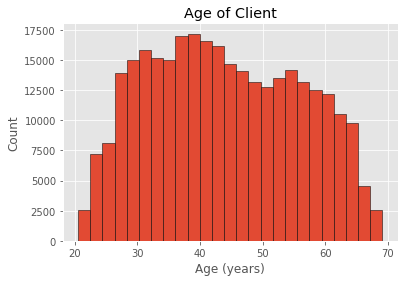

In [122]:
# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

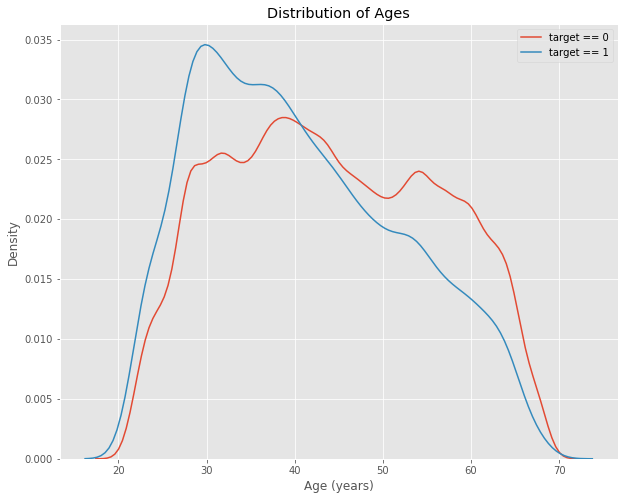

In [123]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

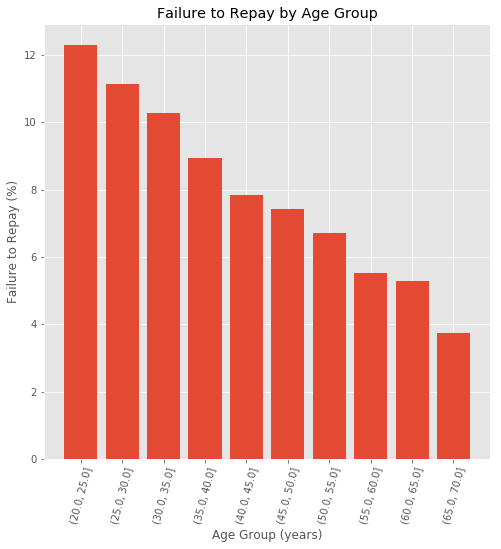

In [124]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [125]:
app_train[['DAYS_BIRTH','DAYS_EMPLOYED']].corr()

,DAYS_BIRTH,DAYS_EMPLOYED
DAYS_BIRTH,1.000000,0.615866
DAYS_EMPLOYED,0.615866,1.000000


<h2 style='color:#32c3ff'><b>DAYS_EMPLOYED</h2>
    
    How many days before the application the person started current employment

In [126]:
app_train['DAYS_EMPLOYED'].isnull().sum()

0

In [127]:
app_train['DAYS_EMPLOYED'].mean()/365

174.8393117652837

In [128]:
app_train['DAYS_EMPLOYED'].describe()

count    307505.000000
mean      63816.348794
std      141276.836143
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [129]:
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])

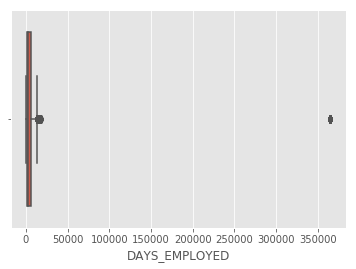

In [130]:
sns.boxplot(app_train['DAYS_EMPLOYED']);

In [131]:
app_train[app_train['DAYS_EMPLOYED'] == 365243].shape

(55374, 121)

from kaggle: "Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values."

In [132]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan)

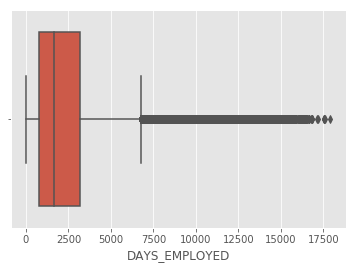

In [133]:
sns.boxplot(app_train['DAYS_EMPLOYED']);

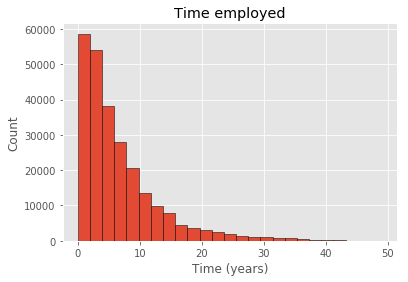

In [134]:
# Plot the distribution of days employed in years
plt.hist(app_train['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 25)
plt.title('Time employed'); plt.xlabel('Time (years)'); plt.ylabel('Count');

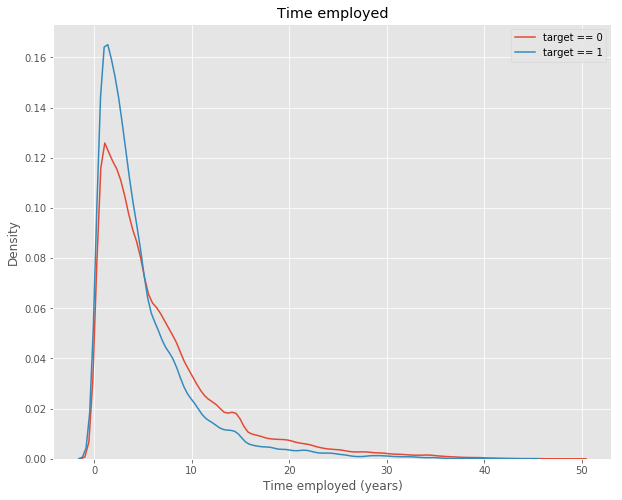

In [135]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Time employed (years)'); plt.ylabel('Density'); plt.title('Time employed');

<h2 style='color:#32c3ff'><b>DAYS_REGISTRATION</h2>
    
    How many days before the application did client change his registration

In [136]:
app_train['DAYS_REGISTRATION'].isnull().sum()

0

In [137]:
app_train['DAYS_REGISTRATION'].describe()

count    307505.000000
mean      -4986.147994
std        3522.887818
min      -24672.000000
25%       -7480.000000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [138]:
app_train['DAYS_REGISTRATION'] = abs(app_train['DAYS_REGISTRATION'])

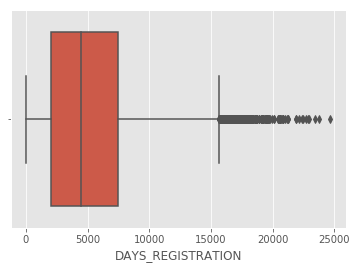

In [139]:
sns.boxplot(app_train['DAYS_REGISTRATION']);

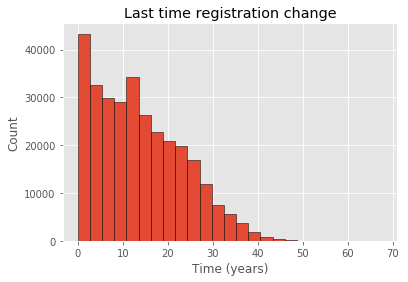

In [140]:
# Plot the distribution of days employed in years
plt.hist(app_train['DAYS_REGISTRATION'] / 365, edgecolor = 'k', bins = 25)
plt.title('Last time registration change'); plt.xlabel('Time (years)'); plt.ylabel('Count');

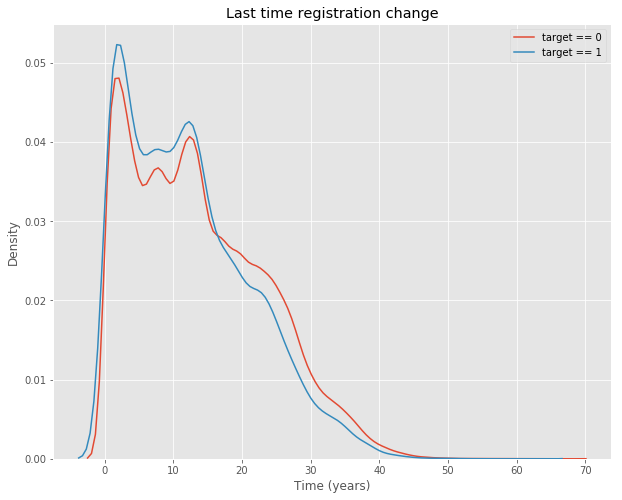

In [141]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_REGISTRATION'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_REGISTRATION'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Time (years)'); plt.ylabel('Density'); plt.title('Last time registration change');

<h2 style='color:#32c3ff'><b>DAYS_ID_PUBLISH</h2>
    
    How many days before the application did client change the identity document with which he applied for the loan

In [142]:
app_train['DAYS_ID_PUBLISH'].isnull().sum()

0

In [143]:
app_train['DAYS_ID_PUBLISH'].describe()

count    307505.000000
mean      -2994.201437
std        1509.454886
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [144]:
app_train['DAYS_ID_PUBLISH'] = abs(app_train['DAYS_ID_PUBLISH'])

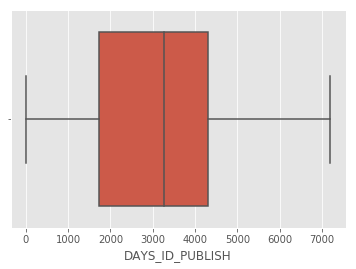

In [145]:
sns.boxplot(app_train['DAYS_ID_PUBLISH']);

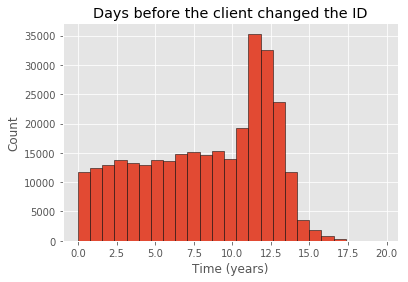

In [146]:
# Plot the distribution of days employed in years
plt.hist(app_train['DAYS_ID_PUBLISH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Days before the client changed the ID'); plt.xlabel('Time (years)'); plt.ylabel('Count');

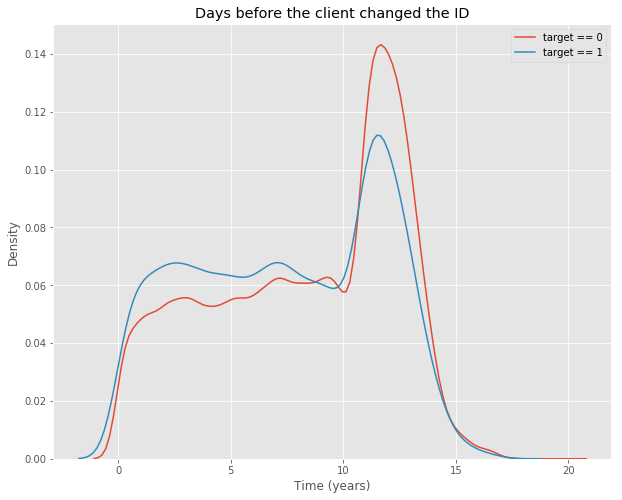

In [147]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_ID_PUBLISH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_ID_PUBLISH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Time (years)'); plt.ylabel('Density'); plt.title('Days before the client changed the ID');

<h2 style='color:#32c3ff'><b>OWN_CAR_AGE</h2>
    
    Age of client's car

In [148]:
app_train['OWN_CAR_AGE'].isnull().sum()

202925

In [149]:
app_train['OWN_CAR_AGE'].describe()

count    104580.000000
mean         12.061121
std          11.944919
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

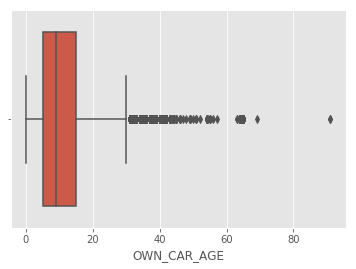

In [150]:
sns.boxplot(app_train['OWN_CAR_AGE']);

In [151]:
#% of nulls
app_train['OWN_CAR_AGE'].isnull().sum()/len(app_train['OWN_CAR_AGE'])

0.6599079689761143

<h2 style='color:#32c3ff'><b>FLAG_MOBIL</h2>
    
    Did client provide mobile phone (1=YES, 0=NO)

In [152]:
app_train['FLAG_MOBIL'].isnull().sum()

0

In [153]:
app_train['FLAG_MOBIL'].value_counts()

1    307504
0         1
Name: FLAG_MOBIL, dtype: int64

<h2 style='color:#32c3ff'><b>FLAG_EMP_PHONE</h2>
    
    Did client provide work phone (1=YES, 0=NO)

In [154]:
app_train['FLAG_EMP_PHONE'].isnull().sum()

0

In [155]:
app_train['FLAG_EMP_PHONE'].value_counts()

1    252119
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

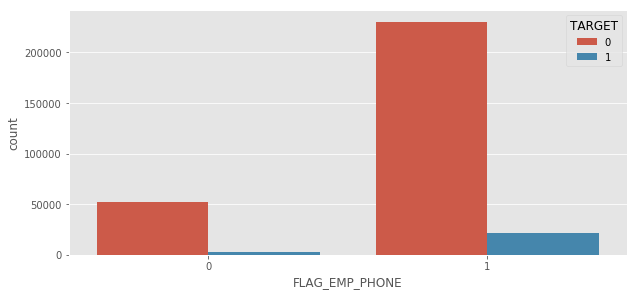

In [156]:
plt.figure(figsize=(10,0.45*10))
sns.countplot(app_train['FLAG_EMP_PHONE'], hue=app_train['TARGET']);

In [157]:
flag_emp = app_train['FLAG_EMP_PHONE'].unique()
flag_emp_default = []

for i in flag_emp:
    flag_emp_default.append((app_train[app_train['FLAG_EMP_PHONE'] == i]['TARGET'].mean())*100)

for i, j in zip(flag_emp, flag_emp_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 1 default on 8.66% of loans
Clients whose are 0 default on 5.40% of loans


<h2 style='color:#32c3ff'><b>FLAG_WORK_PHONE</h2>
    
    Did client provide home phone (1=YES, 0=NO)

In [158]:
app_train['FLAG_WORK_PHONE'].isnull().sum()

0

In [159]:
app_train['FLAG_WORK_PHONE'].value_counts()

0    246202
1     61303
Name: FLAG_WORK_PHONE, dtype: int64

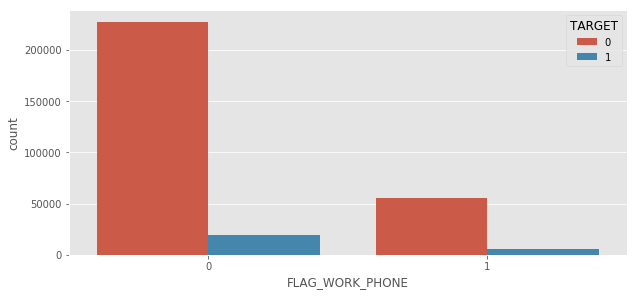

In [160]:
plt.figure(figsize=(10,0.45*10))
sns.countplot(app_train['FLAG_WORK_PHONE'], hue=app_train['TARGET']);

In [161]:
flag_work = app_train['FLAG_EMP_PHONE'].unique()
flag_work_default = []

for i in flag_work:
    flag_work_default.append((app_train[app_train['FLAG_WORK_PHONE'] == i]['TARGET'].mean())*100)

for i, j in zip(flag_work, flag_work_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 1 default on 9.63% of loans
Clients whose are 0 default on 7.69% of loans


<h2 style='color:#32c3ff'><b>FLAG_CONT_MOBILE</h2>
    
    Was mobile phone reachable (1=YES, 0=NO)

In [162]:
app_train['FLAG_CONT_MOBILE'].isnull().sum()

0

In [163]:
app_train['FLAG_CONT_MOBILE'].value_counts()

1    306931
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

<h2 style='color:#32c3ff'><b>FLAG_PHONE</h2>
    
    Did client provide home phone (1=YES, 0=NO)

In [164]:
app_train['FLAG_PHONE'].isnull().sum()

0

In [165]:
app_train['FLAG_PHONE'].value_counts()

0    221079
1     86426
Name: FLAG_PHONE, dtype: int64

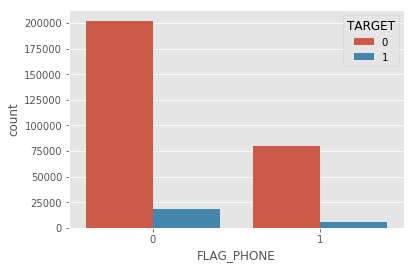

In [166]:
sns.countplot(app_train['FLAG_PHONE'], hue=app_train['TARGET']);

In [167]:
flag_phone = app_train['FLAG_PHONE'].unique()
flag_phone_default = []

for i in flag_phone:
    flag_phone_default.append((app_train[app_train['FLAG_PHONE'] == i]['TARGET'].mean())*100)

for i, j in zip(flag_phone, flag_phone_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 1 default on 7.04% of loans
Clients whose are 0 default on 8.48% of loans


<h2 style='color:#32c3ff'><b>FLAG_EMAIL</h2>
    
    Did client provide email (1=YES, 0=NO)

In [168]:
app_train['FLAG_EMAIL'].isnull().sum()

0

In [169]:
app_train['FLAG_EMAIL'].value_counts()

0    290063
1     17442
Name: FLAG_EMAIL, dtype: int64

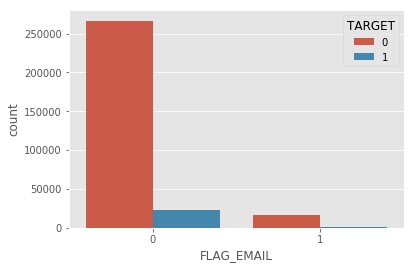

In [170]:
sns.countplot(app_train['FLAG_EMAIL'], hue=app_train['TARGET']);

In [171]:
flag_email = app_train['FLAG_EMAIL'].unique()
flag_email_default = []

for i in flag_email:
    flag_email_default.append((app_train[app_train['FLAG_EMAIL'] == i]['TARGET'].mean())*100)

for i, j in zip(flag_email, flag_email_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 0 default on 8.08% of loans
Clients whose are 1 default on 7.88% of loans


<h2 style='color:#32c3ff'><b>OCCUPATION_TYPE</h2>
    
    What kind of occupation does the client have

In [172]:
app_train['OCCUPATION_TYPE'].isnull().sum()

96389

In [173]:
occupation_types = app_train['OCCUPATION_TYPE'].unique()
print(occupation_types)

['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


In [379]:
occupation_types_db = app_train['OCCUPATION_TYPE'].value_counts()

In [385]:
occupation_types_db = pd.DataFrame(occupation_types_db)

In [402]:
occupation_types_db = occupation_types_db.head(10)

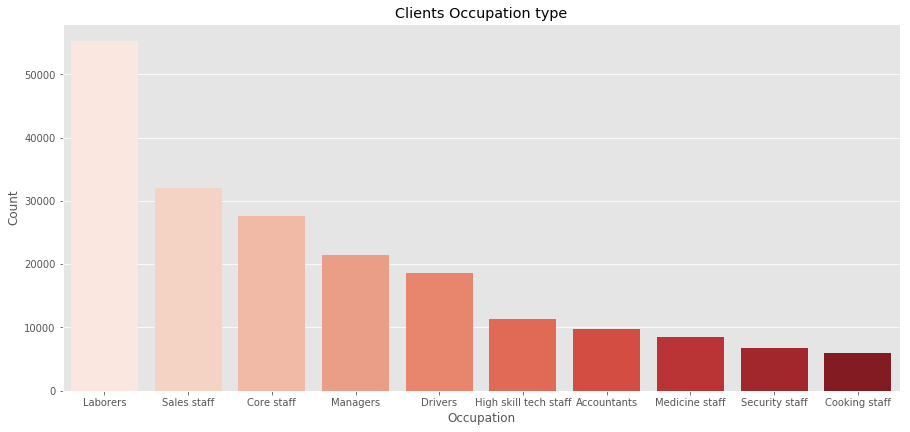

In [413]:
plt.figure(figsize=(15,0.45*15))
sns.barplot(x=occupation_types_db.index, y='OCCUPATION_TYPE', data=occupation_types_db, palette='Reds')
plt.title('Clients Occupation type'); plt.xlabel('Occupation'); plt.ylabel('Count');

In [175]:
#% of nulls 
app_train['OCCUPATION_TYPE'].isnull().sum()/len(app_train['OCCUPATION_TYPE'])

0.3134550657712883

In [176]:
occupation_type_default = []

for i in occupation_types:
    occupation_type_default.append((app_train[app_train['OCCUPATION_TYPE'] == i]['TARGET'].mean())*100)

for i, j in zip(occupation_types, occupation_type_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are Laborers default on 10.58% of loans
Clients whose are Core staff default on 6.30% of loans
Clients whose are Accountants default on 4.83% of loans
Clients whose are Managers default on 6.21% of loans
Clients whose are nan default on nan% of loans
Clients whose are Drivers default on 11.33% of loans
Clients whose are Sales staff default on 9.63% of loans
Clients whose are Cleaning staff default on 9.61% of loans
Clients whose are Cooking staff default on 10.44% of loans
Clients whose are Private service staff default on 6.60% of loans
Clients whose are Medicine staff default on 6.70% of loans
Clients whose are Security staff default on 10.74% of loans
Clients whose are High skill tech staff default on 6.16% of loans
Clients whose are Waiters/barmen staff default on 11.28% of loans
Clients whose are Low-skill Laborers default on 17.16% of loans
Clients whose are Realty agents default on 7.86% of loans
Clients whose are Secretaries default on 7.05% of loans
Clients whose

<h2 style='color:#32c3ff'><b>CNT_FAM_MEMBERS</h2>
    
    How many family members does client have

In [177]:
app_train['CNT_FAM_MEMBERS'].isnull().sum()

0

In [178]:
app_train['CNT_FAM_MEMBERS'].value_counts()

2.0     158355
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

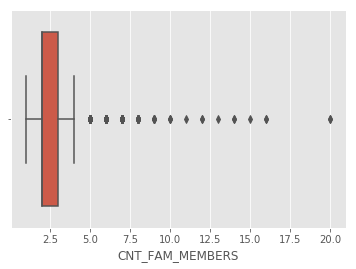

In [179]:
sns.boxplot(app_train['CNT_FAM_MEMBERS']);

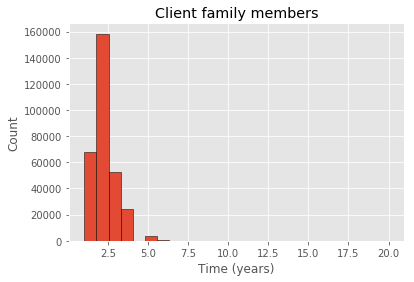

In [180]:
# Plot the distribution of days employed in years
plt.hist(app_train['CNT_FAM_MEMBERS'], edgecolor = 'k', bins = 25)
plt.title('Client family members'); plt.xlabel('Time (years)'); plt.ylabel('Count');

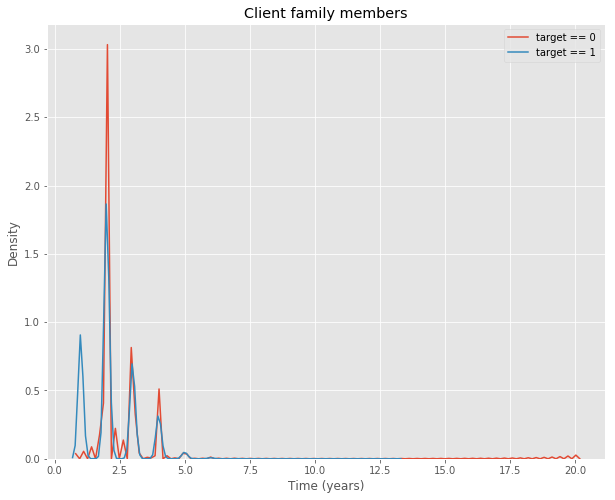

In [181]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'CNT_FAM_MEMBERS'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'CNT_FAM_MEMBERS'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Time (years)'); plt.ylabel('Density'); plt.title('Client family members');

<h2 style='color:#32c3ff'><b>REGION_RATING_CLIENT</h2>
    
    Our rating of the region where client lives (1,2,3)

In [182]:
app_train['REGION_RATING_CLIENT'].isnull().sum()

0

In [183]:
app_train['REGION_RATING_CLIENT'].value_counts()

2    226979
3     48329
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

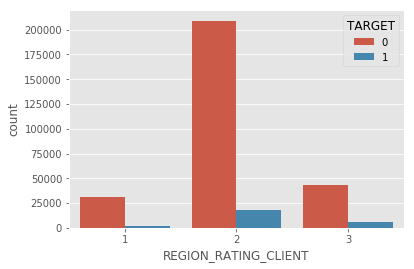

In [184]:
sns.countplot(app_train['REGION_RATING_CLIENT'], hue=app_train['TARGET']);

In [185]:
rating_client = app_train['REGION_RATING_CLIENT'].unique()
rating_client_default = []

for i in flag_email:
    rating_client_default.append((app_train[app_train['REGION_RATING_CLIENT'] == i]['TARGET'].mean())*100)

for i, j in zip(rating_client, rating_client_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 2 default on nan% of loans
Clients whose are 1 default on 4.82% of loans


<h2 style='color:#32c3ff'><b>WEEKDAY_APPR_PROCESS_START</h2>
    
    On which day of the week did the client apply for the loan

In [186]:
app_train['WEEKDAY_APPR_PROCESS_START'].isnull().sum()

0

In [187]:
app_train['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53900
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50589
FRIDAY       50335
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

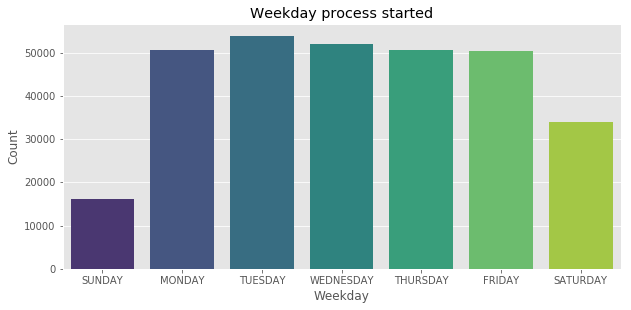

In [188]:
plt.figure(figsize=(10,0.45*10))
plt.title('Weekday process started')
sns.countplot(app_train['WEEKDAY_APPR_PROCESS_START'], order=['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY',
                                                              'FRIDAY', 'SATURDAY'], palette='viridis')
plt.xlabel('Weekday')
plt.ylabel('Count');

In [189]:
week_day = app_train['WEEKDAY_APPR_PROCESS_START'].unique()
week_day_default = []

for i in week_day:
    week_day_default.append((app_train[app_train['WEEKDAY_APPR_PROCESS_START'] == i]['TARGET'].mean())*100)

for i, j in zip(week_day, week_day_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are WEDNESDAY default on 8.16% of loans
Clients whose are MONDAY default on 7.76% of loans
Clients whose are THURSDAY default on 8.10% of loans
Clients whose are SUNDAY default on 7.93% of loans
Clients whose are SATURDAY default on 7.89% of loans
Clients whose are FRIDAY default on 8.15% of loans
Clients whose are TUESDAY default on 8.35% of loans


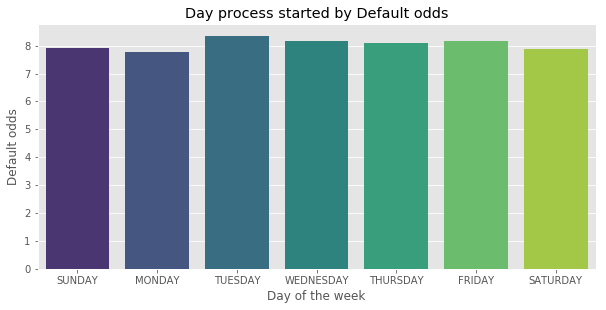

In [190]:
day_odds = pd.DataFrame(data=week_day_default, index=week_day, columns=['Default odds'])
plt.figure(figsize=(10,0.45*10))
plt.title('Day process started by Default odds')
ax = sns.barplot(x=day_odds.index, y=day_odds['Default odds'], order=['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY',
                                                                                'THURSDAY', 'FRIDAY', 'SATURDAY'],
                palette='viridis')
plt.xlabel('Day of the week');

<h2 style='color:#32c3ff'><b>HOUR_APPR_PROCESS_START</h2>
    
    Approximately at what hour did the client apply for the loan

In [191]:
app_train['HOUR_APPR_PROCESS_START'].isnull().sum()

0

In [192]:
app_train['HOUR_APPR_PROCESS_START'].value_counts()

10    37721
11    37229
12    34233
13    30959
14    27681
9     27384
15    24836
16    20384
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

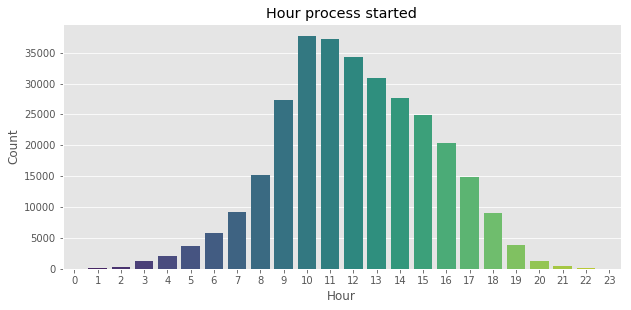

In [193]:
plt.figure(figsize=(10,0.45*10))
plt.title('Hour process started')
sns.countplot(app_train['HOUR_APPR_PROCESS_START'], palette='viridis')
plt.xlabel('Hour')
plt.ylabel('Count');

In [194]:
hour_appr = app_train['HOUR_APPR_PROCESS_START'].unique()
hour_appr_default = []

for i in hour_appr:
    hour_appr_default.append((app_train[app_train['HOUR_APPR_PROCESS_START'] == i]['TARGET'].mean())*100)

for i, j in zip(hour_appr, hour_appr_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 10 default on 8.02% of loans
Clients whose are 11 default on 8.07% of loans
Clients whose are 9 default on 8.21% of loans
Clients whose are 17 default on 6.49% of loans
Clients whose are 16 default on 7.46% of loans
Clients whose are 14 default on 7.91% of loans
Clients whose are 8 default on 9.08% of loans
Clients whose are 15 default on 7.59% of loans
Clients whose are 7 default on 10.04% of loans
Clients whose are 13 default on 8.03% of loans
Clients whose are 6 default on 11.04% of loans
Clients whose are 12 default on 8.26% of loans
Clients whose are 19 default on 6.86% of loans
Clients whose are 3 default on 8.70% of loans
Clients whose are 18 default on 7.02% of loans
Clients whose are 21 default on 6.17% of loans
Clients whose are 4 default on 8.28% of loans
Clients whose are 5 default on 10.58% of loans
Clients whose are 20 default on 7.02% of loans
Clients whose are 22 default on 10.00% of loans
Clients whose are 1 default on 8.14% of loans
Clients whose are

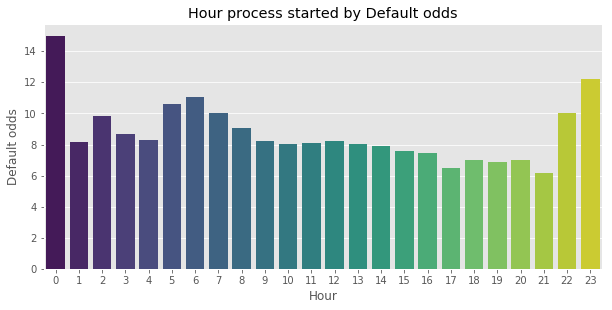

In [195]:
hour_odds = pd.DataFrame(data=hour_appr_default, index=hour_appr, columns=['Default odds'])
plt.figure(figsize=(10,0.45*10))
plt.title('Hour process started by Default odds')
sns.barplot(x=hour_odds.index, y=hour_odds['Default odds'],palette='viridis')
plt.xlabel('Hour');

<h2 style='color:#32c3ff'><b>REG_REGION_NOT_LIVE_REGION</h2>
    
    Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

In [196]:
app_train['REG_REGION_NOT_LIVE_REGION'].isnull().sum()

0

In [197]:
app_train['REG_REGION_NOT_LIVE_REGION'].value_counts()

0    302848
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

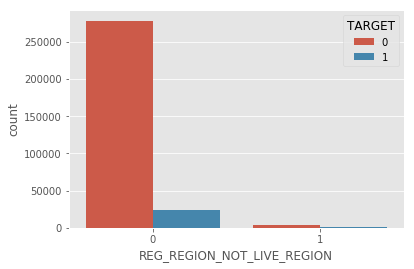

In [198]:
sns.countplot(app_train['REG_REGION_NOT_LIVE_REGION'], hue=app_train['TARGET']);

In [199]:
live_region = app_train['REG_REGION_NOT_LIVE_REGION'].unique()
live_region_default = []

for i in live_region:
    live_region_default.append((app_train[app_train['REG_REGION_NOT_LIVE_REGION'] == i]['TARGET'].mean())*100)

for i, j in zip(live_region, live_region_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 0 default on 8.05% of loans
Clients whose are 1 default on 9.30% of loans


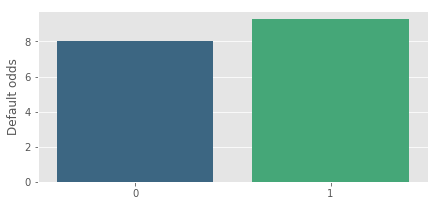

In [200]:
live_odds = pd.DataFrame(data=live_region_default, index=live_region, columns=['Default odds'])
plt.figure(figsize=(7,0.45*7))
sns.barplot(x=live_odds.index, y=live_odds['Default odds'],palette='viridis');

<h2 style='color:#32c3ff'><b>REG_REGION_NOT_WORK_REGION</h2>
    
    Flag if client's permanent address does not match work address (1=different, 0=same, at region level)

In [201]:
app_train['REG_REGION_NOT_WORK_REGION'].isnull().sum()

0

In [202]:
app_train['REG_REGION_NOT_WORK_REGION'].value_counts()

0    291894
1     15611
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

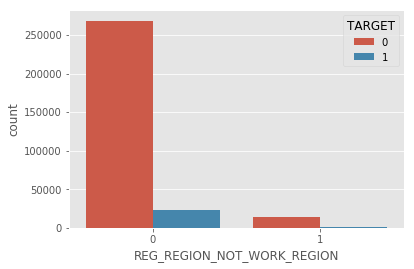

In [203]:
sns.countplot(app_train['REG_REGION_NOT_WORK_REGION'], hue=app_train['TARGET']);

In [204]:
work_region = app_train['REG_REGION_NOT_WORK_REGION'].unique()
work_region_default = []

for i in work_region:
    work_region_default.append((app_train[app_train['REG_REGION_NOT_WORK_REGION'] == i]['TARGET'].mean())*100)

for i, j in zip(work_region, work_region_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 0 default on 8.03% of loans
Clients whose are 1 default on 8.89% of loans


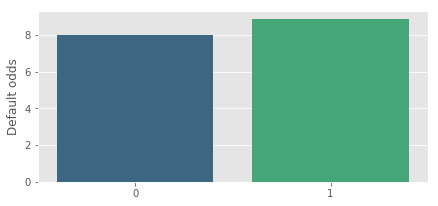

In [205]:
work_odds = pd.DataFrame(data=work_region_default, index=work_region, columns=['Default odds'])
plt.figure(figsize=(7,0.45*7))
sns.barplot(x=work_odds.index, y=work_odds['Default odds'],palette='viridis');

<h2 style='color:#32c3ff'><b>LIVE_REGION_NOT_WORK_REGION</h2>
    
    Flag if client's contact address does not match work address (1=different, 0=same, at region level)

In [206]:
app_train['LIVE_REGION_NOT_WORK_REGION'].isnull().sum()

0

In [207]:
app_train['LIVE_REGION_NOT_WORK_REGION'].value_counts()

0    295003
1     12502
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

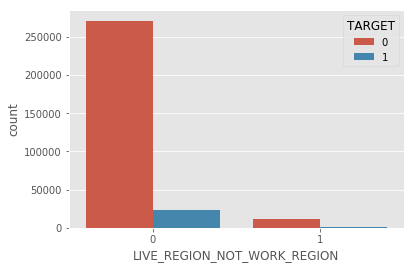

In [208]:
sns.countplot(app_train['LIVE_REGION_NOT_WORK_REGION'], hue=app_train['TARGET']);

In [209]:
live_work_region = app_train['LIVE_REGION_NOT_WORK_REGION'].unique()
live_work_region_default = []

for i in live_work_region:
    live_work_region_default.append((app_train[app_train['LIVE_REGION_NOT_WORK_REGION'] == i]['TARGET'].mean())*100)

for i, j in zip(live_work_region, live_work_region_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 0 default on 8.06% of loans
Clients whose are 1 default on 8.45% of loans


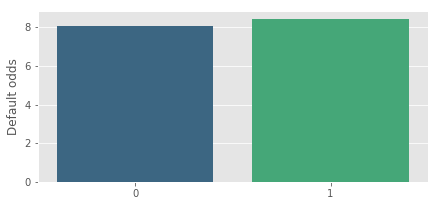

In [210]:
live_work_odds = pd.DataFrame(data=live_work_region_default, index=live_work_region, columns=['Default odds'])
plt.figure(figsize=(7,0.45*7))
sns.barplot(x=live_work_odds.index, y=live_work_odds['Default odds'],palette='viridis');

<h2 style='color:#32c3ff'><b>REG_CITY_NOT_LIVE_CITY</h2>
    
    Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

In [211]:
app_train['REG_CITY_NOT_LIVE_CITY'].isnull().sum()

0

In [212]:
app_train['REG_CITY_NOT_LIVE_CITY'].value_counts()

0    283466
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

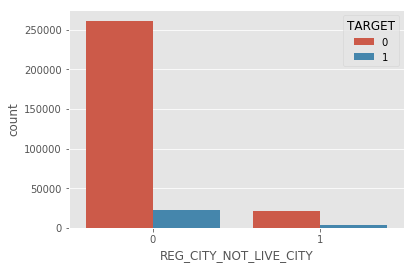

In [213]:
sns.countplot(app_train['REG_CITY_NOT_LIVE_CITY'], hue=app_train['TARGET']);

In [214]:
not_live_city = app_train['REG_CITY_NOT_LIVE_CITY'].unique()
not_live_city_default = []

for i in not_live_city:
    not_live_city_default.append((app_train[app_train['REG_CITY_NOT_LIVE_CITY'] == i]['TARGET'].mean())*100)

for i, j in zip(not_live_city, not_live_city_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 0 default on 7.72% of loans
Clients whose are 1 default on 12.23% of loans


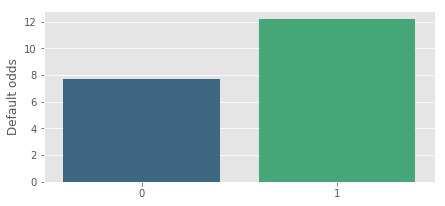

In [215]:
not_live_city_odds = pd.DataFrame(data=not_live_city_default, index=not_live_city, columns=['Default odds'])
plt.figure(figsize=(7,0.45*7))
sns.barplot(x=not_live_city_odds.index, y=not_live_city_odds['Default odds'],palette='viridis');

<h2 style='color:#32c3ff'><b>REG_CITY_NOT_WORK_CITY</h2>
    
    Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

In [216]:
app_train['REG_CITY_NOT_WORK_CITY'].isnull().sum()

0

In [217]:
app_train['REG_CITY_NOT_WORK_CITY'].value_counts()

0    236639
1     70866
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

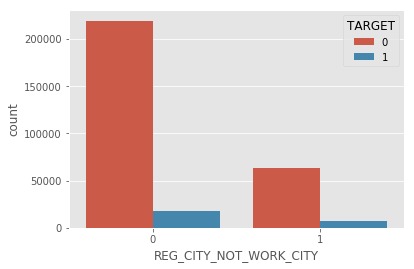

In [218]:
sns.countplot(app_train['REG_CITY_NOT_WORK_CITY'], hue=app_train['TARGET']);

In [219]:
not_work_city = app_train['REG_CITY_NOT_WORK_CITY'].unique()
not_work_city_default = []

for i in not_work_city:
    not_work_city_default.append((app_train[app_train['REG_CITY_NOT_WORK_CITY'] == i]['TARGET'].mean())*100)

for i, j in zip(not_work_city, not_work_city_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 0 default on 7.31% of loans
Clients whose are 1 default on 10.61% of loans


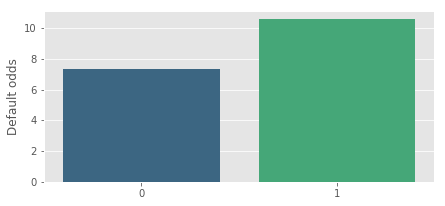

In [220]:
not_work_city_odds = pd.DataFrame(data=not_work_city_default, index=not_work_city, columns=['Default odds'])
plt.figure(figsize=(7,0.45*7))
sns.barplot(x=not_work_city_odds.index, y=not_work_city_odds['Default odds'],palette='viridis');

<h2 style='color:#32c3ff'><b>LIVE_CITY_NOT_WORK_CITY</h2>
    
    Flag if client's contact address does not match work address (1=different, 0=same, at city level)

In [221]:
app_train['LIVE_CITY_NOT_WORK_CITY'].isnull().sum()

0

In [222]:
app_train['LIVE_CITY_NOT_WORK_CITY'].value_counts()

0    252291
1     55214
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

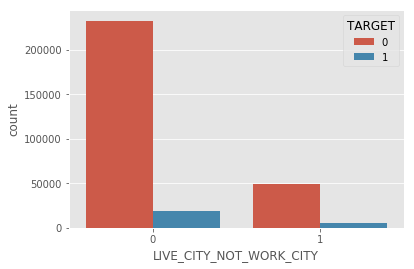

In [223]:
sns.countplot(app_train['LIVE_CITY_NOT_WORK_CITY'], hue=app_train['TARGET']);

In [224]:
live_not_work_city = app_train['LIVE_CITY_NOT_WORK_CITY'].unique()
live_not_work_city_default = []

for i in live_not_work_city:
    live_not_work_city_default.append((app_train[app_train['LIVE_CITY_NOT_WORK_CITY'] == i]['TARGET'].mean())*100)

for i, j in zip(live_not_work_city, live_not_work_city_default):
    print("Clients whose are %s default on %0.2f%% of loans" % (i,j))

Clients whose are 0 default on 7.66% of loans
Clients whose are 1 default on 9.97% of loans


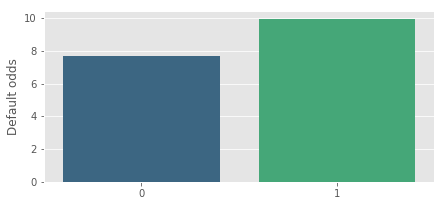

In [225]:
live_not_work_city_odds = pd.DataFrame(data=live_not_work_city_default, index=live_not_work_city, columns=['Default odds'])
plt.figure(figsize=(7,0.45*7))
sns.barplot(x=live_not_work_city_odds.index, y=live_not_work_city_odds['Default odds'],palette='viridis');

<h2 style='color:#32c3ff'><b>ORGANIZATION_TYPE</h2>
    
    Type of organization where client works

In [226]:
app_train['ORGANIZATION_TYPE'].isnull().sum()

55374

In [227]:
#% is null
app_train['ORGANIZATION_TYPE'].isnull().sum()/len(app_train['ORGANIZATION_TYPE'])

0.18007512072974424

In [228]:
len(app_train['ORGANIZATION_TYPE'].unique())

58

In [229]:
app_train['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', nan, 'Electricity', 'Medicine', 'Business Entity Type 2',
       'Self-employed', 'Transport: type 2', 'Construction', 'Housing',
       'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Military',
       'Services', 'Security Ministries', 'Transport: type 4',
       'Industry: type 1', 'Emergency', 'Security', 'Trade: type 2',
       'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'Ind

In [230]:
org_type = app_train['ORGANIZATION_TYPE'].unique()
org_type_default = []

for i in org_type:
    org_type_default.append((app_train[app_train['ORGANIZATION_TYPE'] == i]['TARGET'].mean())*100)
    
org_type_odds = pd.DataFrame(data=org_type_default, index=org_type, columns=['Default odds'])

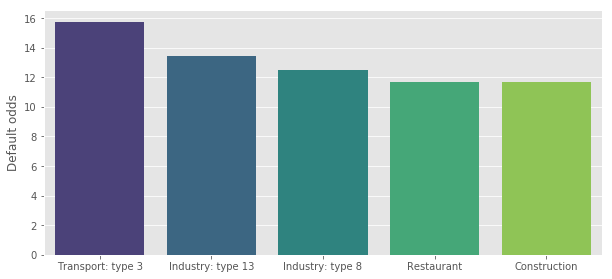

In [231]:
top5_org_type_odds = org_type_odds.sort_values(by='Default odds', ascending=False).head(5)
plt.figure(figsize=(10,0.45*10))
sns.barplot(x=top5_org_type_odds.index, y=top5_org_type_odds['Default odds'],palette='viridis');

<h2 style='color:#32c3ff'><b>EXT_SOURCE_1</h2>
    
    Normalized score from external data source

In [232]:
app_train['EXT_SOURCE_1'].isnull().sum()

173375

In [233]:
app_train['EXT_SOURCE_1'].describe()

count    134130.000000
mean          0.502128
std           0.211064
min           0.014568
25%           0.334007
50%           0.505996
75%           0.675060
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

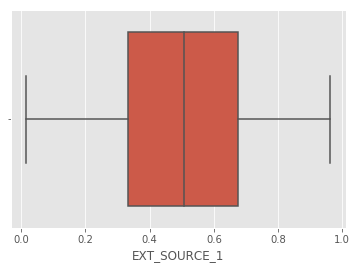

In [234]:
sns.boxplot(app_train['EXT_SOURCE_1']);

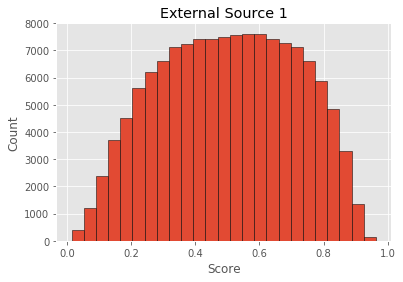

In [235]:
# Plot the distribution of days employed in years
plt.hist(app_train['EXT_SOURCE_1'], edgecolor = 'k', bins = 25)
plt.title('External Source 1'); plt.xlabel('Score'); plt.ylabel('Count');

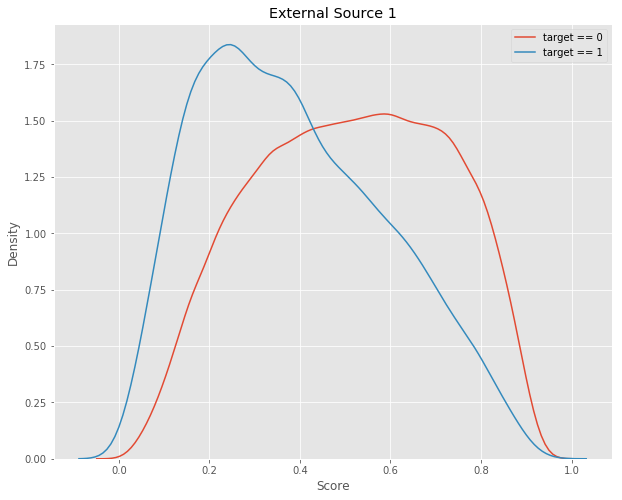

In [236]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_1'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_1'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Score'); plt.ylabel('Density'); plt.title('External Source 1');

<h2 style='color:#32c3ff'><b>EXT_SOURCE_2</h2>
    
    Normalized score from external data source

In [237]:
app_train['EXT_SOURCE_2'].isnull().sum()

660

In [238]:
app_train['EXT_SOURCE_2'].describe()

count    3.068450e+05
mean     5.143908e-01
std      1.910605e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659561e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

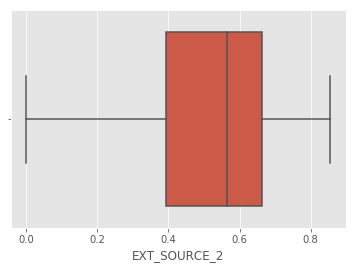

In [239]:
sns.boxplot(app_train['EXT_SOURCE_2']);

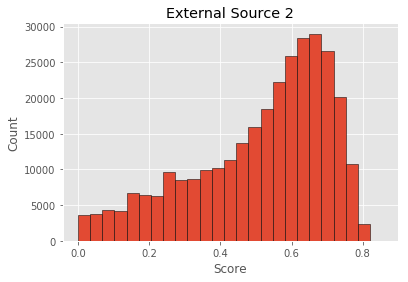

In [240]:
# Plot the distribution of days employed in years
plt.hist(app_train['EXT_SOURCE_2'], edgecolor = 'k', bins = 25)
plt.title('External Source 2'); plt.xlabel('Score'); plt.ylabel('Count');

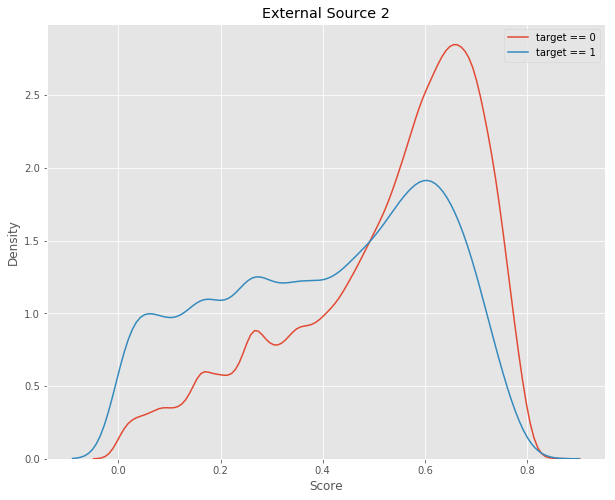

In [241]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Score'); plt.ylabel('Density'); plt.title('External Source 2');

<h2 style='color:#32c3ff'><b>EXT_SOURCE_3</h2>
    
    Normalized score from external data source

In [242]:
app_train['EXT_SOURCE_3'].isnull().sum()

60964

In [243]:
app_train['EXT_SOURCE_3'].describe()

count    246541.000000
mean          0.510856
std           0.194843
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

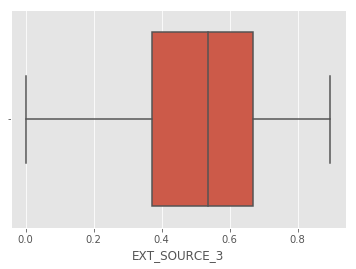

In [244]:
sns.boxplot(app_train['EXT_SOURCE_3']);

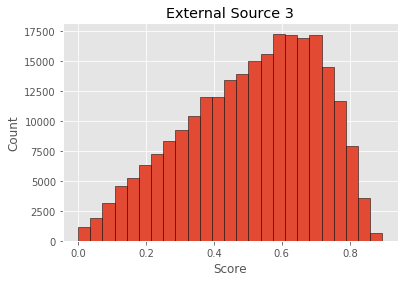

In [245]:
# Plot the distribution of days employed in years
plt.hist(app_train['EXT_SOURCE_3'], edgecolor = 'k', bins = 25)
plt.title('External Source 3'); plt.xlabel('Score'); plt.ylabel('Count');

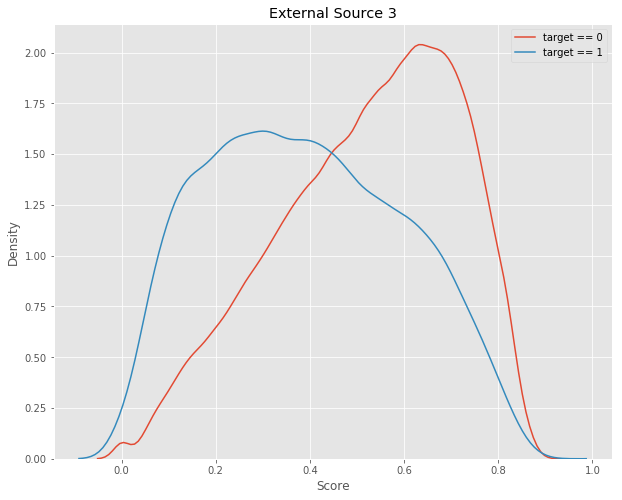

In [246]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Score'); plt.ylabel('Density'); plt.title('External Source 3');

In [247]:
db_external_sources = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

In [248]:
db_external_sources.corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000000,0.213979,0.186845
EXT_SOURCE_2,0.213979,1.000000,0.109180
EXT_SOURCE_3,0.186845,0.109180,1.000000


<h2 style='color:#32c3ff'><b>APARTMENTS_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [249]:
app_train['APARTMENTS_AVG'].isnull().sum()

156059

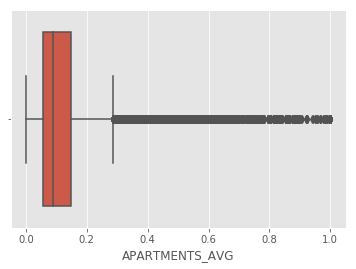

In [250]:
sns.boxplot(app_train['APARTMENTS_AVG']);

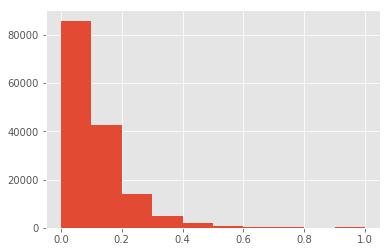

In [251]:
plt.hist(app_train['APARTMENTS_AVG']);

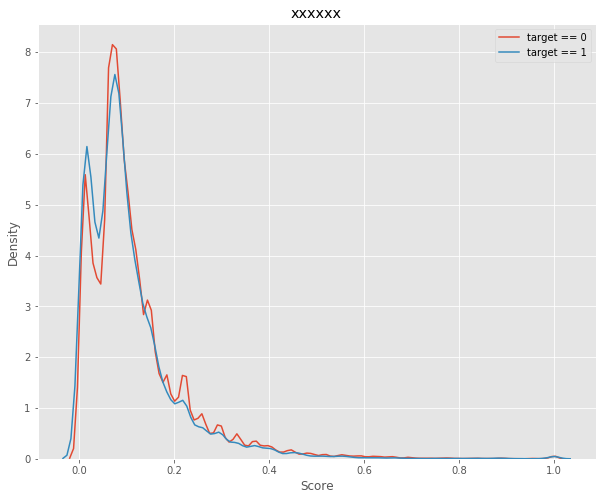

In [252]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'APARTMENTS_AVG'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'APARTMENTS_AVG'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Score'); plt.ylabel('Density'); plt.title('xxxxxx');

<h2 style='color:#32c3ff'><b>BASEMENTAREA_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [253]:
app_train['BASEMENTAREA_AVG'].isnull().sum()

179941

<h2 style='color:#32c3ff'><b>YEARS_BEGINEXPLUATATION_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [254]:
app_train['YEARS_BEGINEXPLUATATION_AVG'].isnull().sum()

150005

<h2 style='color:#32c3ff'><b>YEARS_BUILD_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [255]:
app_train['YEARS_BUILD_AVG'].isnull().sum()

204485

<h2 style='color:#32c3ff'><b>COMMONAREA_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [256]:
app_train['COMMONAREA_AVG'].isnull().sum()

214861

<h2 style='color:#32c3ff'><b>ELEVATORS_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [257]:
app_train['ELEVATORS_AVG'].isnull().sum()

163889

<h2 style='color:#32c3ff'><b>ENTRANCES_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [258]:
app_train['ENTRANCES_AVG'].isnull().sum()

154826

<h2 style='color:#32c3ff'><b>FLOORSMAX_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [259]:
app_train['FLOORSMAX_AVG'].isnull().sum()

153018

<h2 style='color:#32c3ff'><b>FLOORSMIN_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [260]:
app_train['FLOORSMIN_AVG'].isnull().sum()

208639

<h2 style='color:#32c3ff'><b>LANDAREA_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [261]:
app_train['LANDAREA_AVG'].isnull().sum()

182586

<h2 style='color:#32c3ff'><b>LIVINGAPARTMENTS_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [262]:
app_train['LIVINGAPARTMENTS_AVG'].isnull().sum()

210196

<h2 style='color:#32c3ff'><b>LIVINGAREA_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [263]:
app_train['LIVINGAREA_AVG'].isnull().sum()

154348

<h2 style='color:#32c3ff'><b>NONLIVINGAPARTMENTS_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [264]:
app_train['NONLIVINGAPARTMENTS_AVG'].isnull().sum()

213511

<h2 style='color:#32c3ff'><b>NONLIVINGAREA_AVG</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [265]:
app_train['NONLIVINGAREA_AVG'].isnull().sum()

169679

<h2 style='color:#32c3ff'><b>APARTMENTS_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [266]:
app_train['APARTMENTS_MODE'].isnull().sum()

156059

<h2 style='color:#32c3ff'><b>BASEMENTAREA_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [267]:
app_train['BASEMENTAREA_MODE'].isnull().sum()

179941

<h2 style='color:#32c3ff'><b>YEARS_BEGINEXPLUATATION_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [268]:
app_train['YEARS_BEGINEXPLUATATION_MODE'].isnull().sum()

150005

<h2 style='color:#32c3ff'><b>YEARS_BUILD_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [269]:
app_train['YEARS_BUILD_MODE'].isnull().sum()

204485

<h2 style='color:#32c3ff'><b>COMMONAREA_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [270]:
app_train['COMMONAREA_MODE'].isnull().sum()

214861

<h2 style='color:#32c3ff'><b>ELEVATORS_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [271]:
app_train['ELEVATORS_MODE'].isnull().sum()

163889

<h2 style='color:#32c3ff'><b>ENTRANCES_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [272]:
app_train['ENTRANCES_MODE'].isnull().sum()

154826

<h2 style='color:#32c3ff'><b>FLOORSMAX_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [273]:
app_train['FLOORSMAX_MODE'].isnull().sum()

153018

<h2 style='color:#32c3ff'><b>FLOORSMIN_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [274]:
app_train['FLOORSMIN_MODE'].isnull().sum()

208639

<h2 style='color:#32c3ff'><b>LANDAREA_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [275]:
app_train['LANDAREA_MODE'].isnull().sum()

182586

<h2 style='color:#32c3ff'><b>LIVINGAPARTMENTS_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [276]:
app_train['LIVINGAPARTMENTS_MODE'].isnull().sum()

210196

<h2 style='color:#32c3ff'><b>LIVINGAREA_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [277]:
app_train['LIVINGAREA_MODE'].isnull().sum()

154348

<h2 style='color:#32c3ff'><b>NONLIVINGAPARTMENTS_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [278]:
app_train['NONLIVINGAPARTMENTS_MODE'].isnull().sum()

213511

<h2 style='color:#32c3ff'><b>NONLIVINGAREA_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [279]:
app_train['NONLIVINGAREA_MODE'].isnull().sum()

169679

<h2 style='color:#32c3ff'><b>APARTMENTS_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [280]:
app_train['APARTMENTS_MEDI'].isnull().sum()

156059

<h2 style='color:#32c3ff'><b>BASEMENTAREA_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [281]:
app_train['BASEMENTAREA_MEDI'].isnull().sum()

179941

<h2 style='color:#32c3ff'><b>YEARS_BEGINEXPLUATATION_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [282]:
app_train['YEARS_BEGINEXPLUATATION_MEDI'].isnull().sum()

150005

<h2 style='color:#32c3ff'><b>YEARS_BUILD_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [283]:
app_train['YEARS_BUILD_MEDI'].isnull().sum()

204485

<h2 style='color:#32c3ff'><b>COMMONAREA_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [284]:
app_train['COMMONAREA_MEDI'].isnull().sum()

214861

<h2 style='color:#32c3ff'><b>ELEVATORS_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [285]:
app_train['ELEVATORS_MEDI'].isnull().sum()

163889

<h2 style='color:#32c3ff'><b>ENTRANCES_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [286]:
app_train['ENTRANCES_MEDI'].isnull().sum()

154826

<h2 style='color:#32c3ff'><b>FLOORSMAX_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [287]:
app_train['FLOORSMAX_MEDI'].isnull().sum()

153018

<h2 style='color:#32c3ff'><b>FLOORSMIN_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [288]:
app_train['FLOORSMIN_MEDI'].isnull().sum()

208639

<h2 style='color:#32c3ff'><b>LANDAREA_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [289]:
app_train['LANDAREA_MEDI'].isnull().sum()

182586

<h2 style='color:#32c3ff'><b>LIVINGAPARTMENTS_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [290]:
app_train['LIVINGAPARTMENTS_MEDI'].isnull().sum()

210196

<h2 style='color:#32c3ff'><b>LIVINGAREA_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [291]:
app_train['LIVINGAREA_MEDI'].isnull().sum()

154348

<h2 style='color:#32c3ff'><b>NONLIVINGAPARTMENTS_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [292]:
app_train['NONLIVINGAPARTMENTS_MEDI'].isnull().sum()

213511

<h2 style='color:#32c3ff'><b>NONLIVINGAREA_MEDI</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [293]:
app_train['NONLIVINGAREA_MEDI'].isnull().sum()

169679

<h2 style='color:#32c3ff'><b>FONDKAPREMONT_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [294]:
app_train['FONDKAPREMONT_MODE'].isnull().sum()

210292

<h2 style='color:#32c3ff'><b>HOUSETYPE_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [295]:
app_train['HOUSETYPE_MODE'].isnull().sum()

154295

<h2 style='color:#32c3ff'><b>TOTALAREA_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [296]:
app_train['TOTALAREA_MODE'].isnull().sum()

148429

<h2 style='color:#32c3ff'><b>WALLSMATERIAL_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [297]:
app_train['WALLSMATERIAL_MODE'].isnull().sum()

156339

<h2 style='color:#32c3ff'><b>EMERGENCYSTATE_MODE</h2>
    
    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [298]:
app_train['EMERGENCYSTATE_MODE'].isnull().sum()

145753

<h2 style='color:#32c3ff'><b>OBS_30_CNT_SOCIAL_CIRCLE</h2>

How many observation of client's social surroundings with observable 30 DPD (days past due) default

In [299]:
app_train['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

<h2 style='color:#32c3ff'><b>DEF_30_CNT_SOCIAL_CIRCLE</h2>

How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

In [300]:
app_train['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

<h2 style='color:#32c3ff'><b>OBS_60_CNT_SOCIAL_CIRCLE</h2>

How many observation of client's social surroundings with observable 60 DPD (days past due) default

In [301]:
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

<h2 style='color:#32c3ff'><b>DEF_60_CNT_SOCIAL_CIRCLE</h2>

How many observation of client's social surroundings defaulted on 60 (days past due) DPD

In [302]:
app_train['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

<h2 style='color:#32c3ff'><b>DAYS_LAST_PHONE_CHANGE</h2>

How many days before application did client change phone

In [303]:
app_train['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [304]:
app_train[app_train['DAYS_LAST_PHONE_CHANGE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,252000.0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_2</h2>

Did client provide document 2

In [305]:
app_train['FLAG_DOCUMENT_2'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_3</h2>

Did client provide document 3

In [306]:
app_train['FLAG_DOCUMENT_3'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_4</h2>

Did client provide document 4

In [307]:
app_train['FLAG_DOCUMENT_4'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_5</h2>

Did client provide document 5

In [308]:
app_train['FLAG_DOCUMENT_5'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_6</h2>

Did client provide document 6

In [309]:
app_train['FLAG_DOCUMENT_6'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_7</h2>

Did client provide document 7

In [310]:
app_train['FLAG_DOCUMENT_7'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_8</h2>

Did client provide document 8

In [311]:
app_train['FLAG_DOCUMENT_8'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_9</h2>

Did client provide document 9

In [312]:
app_train['FLAG_DOCUMENT_9'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_10</h2>

Did client provide document 10

In [313]:
app_train['FLAG_DOCUMENT_10'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_11</h2>

Did client provide document 11

In [314]:
app_train['FLAG_DOCUMENT_11'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_12</h2>

Did client provide document 12

In [315]:
app_train['FLAG_DOCUMENT_12'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_13</h2>

Did client provide document 13

In [316]:
app_train['FLAG_DOCUMENT_13'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_14</h2>

Did client provide document 14

In [317]:
app_train['FLAG_DOCUMENT_14'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_15</h2>

Did client provide document 15

In [318]:
app_train['FLAG_DOCUMENT_15'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_16</h2>

Did client provide document 16

In [319]:
app_train['FLAG_DOCUMENT_16'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_17</h2>

Did client provide document 17

In [320]:
app_train['FLAG_DOCUMENT_17'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_18</h2>

Did client provide document 18

In [321]:
app_train['FLAG_DOCUMENT_18'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_19</h2>

Did client provide document 19

In [322]:
app_train['FLAG_DOCUMENT_19'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_20</h2>

Did client provide document 20

In [323]:
app_train['FLAG_DOCUMENT_20'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>FLAG_DOCUMENT_21</h2>

Did client provide document 21

In [324]:
app_train['FLAG_DOCUMENT_21'].isnull().sum()

0

<h2 style='color:#32c3ff'><b>AMT_REQ_CREDIT_BUREAU_HOUR</h2>

Number of enquiries to Credit Bureau about the client one hour before application

In [325]:
app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41518

<h2 style='color:#32c3ff'><b>AMT_REQ_CREDIT_BUREAU_DAY</h2>

Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)

In [326]:
app_train['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41518

<h2 style='color:#32c3ff'><b>AMT_REQ_CREDIT_BUREAU_WEEK</h2>

Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

In [327]:
app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41518

<h2 style='color:#32c3ff'><b>AMT_REQ_CREDIT_BUREAU_MON</h2>

Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)

In [328]:
app_train['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41518

<h2 style='color:#32c3ff'><b>AMT_REQ_CREDIT_BUREAU_QRT</h2>

Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)

In [329]:
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41518

<h2 style='color:#32c3ff'><b>AMT_REQ_CREDIT_BUREAU_YEAR</h2>

Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

In [330]:
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41518

<h2 style='color:#32c3ff'><b>Análise de perfis - médio</h2>

In [331]:
(app_train['EXT_SOURCE_1'].mean() + app_train['EXT_SOURCE_2'].mean() + app_train['EXT_SOURCE_3'].mean())/3

0.5091249590563219

<h2 style='color:#32c3ff'><b>Análise de perfis - jovem (até 29 anos)</h2>

In [332]:
app_train['DAYS_BIRTH_YEARS'] = abs(app_train['DAYS_BIRTH']/365)

In [333]:
#idade média jovem
round(app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['DAYS_BIRTH_YEARS'].mean(),0)

27.0

In [334]:
#sexo
app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['CODE_GENDER'].value_counts()

F    25535
M    19463
Name: CODE_GENDER, dtype: int64

In [335]:
#Contracts
app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         38289
Revolving loans     6709
Name: NAME_CONTRACT_TYPE, dtype: int64

In [336]:
#CAR
app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['FLAG_OWN_CAR'].value_counts()

N    28577
Y    16421
Name: FLAG_OWN_CAR, dtype: int64

In [337]:
#REALTY
app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['FLAG_OWN_REALTY'].value_counts()

Y    27457
N    17541
Name: FLAG_OWN_REALTY, dtype: int64

In [338]:
#CHILDREN
app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['CNT_CHILDREN'].mean()

0.4425752255655807

In [339]:
#INCOME
round(app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['AMT_INCOME_TOTAL'].mean(),0)

159468.0

In [340]:
#CREDIT
round(app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['AMT_CREDIT'].mean(),0)

481895.0

In [341]:
#GOODS PRICE
round(app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['AMT_GOODS_PRICE'].mean(),0)

434453.0

In [342]:
#EMPLOYED
round((app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['DAYS_EMPLOYED'].mean())/365,0)

3.0

In [343]:
#EDUCATION
app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    26352
Higher education                 13806
Incomplete higher                 4455
Lower secondary                    370
Academic degree                     15
Name: NAME_EDUCATION_TYPE, dtype: int64

In [344]:
#NAME_FAMILY_STATUS
app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['NAME_FAMILY_STATUS'].value_counts()

Married                 23352
Single / not married    14967
Civil marriage           5318
Separated                1284
Widow                      77
Name: NAME_FAMILY_STATUS, dtype: int64

In [345]:
#TARGET
app_train[app_train['DAYS_BIRTH_YEARS'] < 30]['TARGET'].value_counts()

0    39843
1     5155
Name: TARGET, dtype: int64

In [346]:
round(5051/(38661+5051),3)

0.116

<h2 style='color:#32c3ff'><b>Profiles Analisys</h2>

In [347]:
#AGE
app_train['DAYS_BIRTH_YEARS'] = round(app_train['DAYS_BIRTH_YEARS'],0)
years_age = app_train['DAYS_BIRTH_YEARS'].unique()
years_age_default = []

for i in years_age:
    years_age_default.append((app_train[app_train['DAYS_BIRTH_YEARS'] == i]['TARGET'].mean())*100)

years_age_odds = pd.DataFrame(data=years_age_default, index=years_age, columns=['Default odds'])

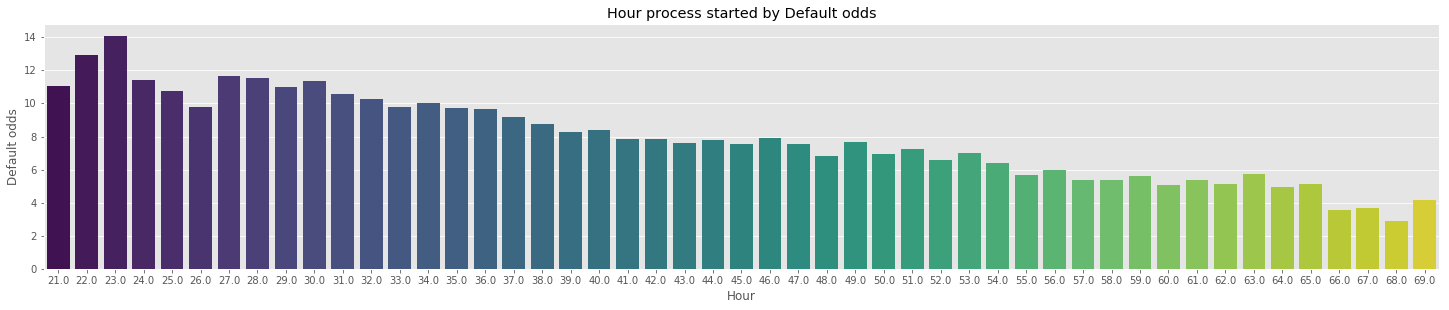

In [348]:
plt.figure(figsize=(25,0.45*10))
plt.title('Hour process started by Default odds')
sns.barplot(x=years_age_odds.index, y=years_age_odds['Default odds'],palette='viridis')
plt.xlabel('Hour');

<b>23 years old more risk, 68 ears old less risk</b>

In [349]:
#GENDER
app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]['CODE_GENDER'].value_counts()

F    1889
M    1780
Name: CODE_GENDER, dtype: int64

In [350]:
#GENDER
app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]['CODE_GENDER'].value_counts()

F    1328
M     326
Name: CODE_GENDER, dtype: int64

In [351]:
#INCOME MEAN
app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]['AMT_INCOME_TOTAL'].mean()

145454.04946852004

In [352]:
#INCOME MEDIAN
app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]['AMT_INCOME_TOTAL'].median()

135000.0

In [353]:
#INCOME MEAN
app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]['AMT_INCOME_TOTAL'].mean()

116744.20193470374

In [354]:
#INCOME MEDIAN
app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]['AMT_INCOME_TOTAL'].median()

112500.0

In [355]:
#CREDIT MEAN
app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]['AMT_CREDIT'].mean()

223499.05955259976

In [356]:
#CREDIT MEDIAN
app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]['AMT_CREDIT'].median()

239850.0

In [357]:
#CREDIT MEAN
app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]['AMT_CREDIT'].mean()

427441.5147179068

In [358]:
#CREDIT MEDIAN
app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]['AMT_CREDIT'].median()

314100.0

In [359]:
#DAYS EMPLOYED
app_train['DAYS_EMPLOYED_YEARS'] = round(app_train['DAYS_EMPLOYED']/365,0)
app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]['DAYS_EMPLOYED_YEARS'].isnull().sum()

1492

In [360]:
#DAYS EMPLOYED
app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]['DAYS_EMPLOYED_YEARS'].value_counts()

1.0    1170
2.0     888
3.0     746
4.0     368
0.0     333
5.0     155
Name: DAYS_EMPLOYED_YEARS, dtype: int64

In [361]:
#EDUCATION
app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    1231
Higher education                  338
Lower secondary                    70
Incomplete higher                  15
Name: NAME_EDUCATION_TYPE, dtype: int64

In [362]:
#EDUCATION
app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    2338
Higher education                  685
Incomplete higher                 620
Lower secondary                    24
Academic degree                     2
Name: NAME_EDUCATION_TYPE, dtype: int64

In [363]:
#NAME_FAMILY_STATUS
app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]['NAME_FAMILY_STATUS'].value_counts()

Married                 758
Widow                   516
Single / not married    201
Separated                95
Civil marriage           84
Name: NAME_FAMILY_STATUS, dtype: int64

In [364]:
#NAME_FAMILY_STATUS
app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]['NAME_FAMILY_STATUS'].value_counts()

Single / not married    1956
Married                 1113
Civil marriage           546
Separated                 50
Widow                      4
Name: NAME_FAMILY_STATUS, dtype: int64

In [365]:
#SCORE
app_train_68 = app_train[app_train['DAYS_BIRTH_YEARS'] == 68.0]
(app_train_68['EXT_SOURCE_1'].mean()+app_train_68['EXT_SOURCE_2'].mean()+app_train_68['EXT_SOURCE_3'].mean())/3

0.6401868199095827

In [366]:
#SCORE
app_train_23 = app_train[app_train['DAYS_BIRTH_YEARS'] == 23.0]
(app_train_23['EXT_SOURCE_1'].mean()+app_train_23['EXT_SOURCE_2'].mean()+app_train_23['EXT_SOURCE_3'].mean())/3

0.3494163290489678

In [367]:
#TARGET
app_train[(app_train['DAYS_BIRTH_YEARS'] == 23.0) & (app_train['CODE_GENDER'] == 'M') 
         & (app_train['CNT_CHILDREN'] == 1) & (app_train['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special')
         ]['TARGET'].value_counts()

0    125
1     38
Name: TARGET, dtype: int64

In [368]:
38/(122+38)

0.2375

In [369]:
#TARGET
app_train[(app_train['DAYS_BIRTH_YEARS'] == 68.0) & (app_train['CODE_GENDER'] == 'F') 
         & (app_train['CNT_CHILDREN'] == 0) & (app_train['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special')
         ]['TARGET'].value_counts()

0    975
1     32
Name: TARGET, dtype: int64

In [370]:
33/(1283+33)

0.02507598784194529

In [371]:
32/(972+32)

0.03187250996015936

In [372]:
app_train[app_train['CODE_GENDER'] == 'M']['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.713168
Higher education                 0.233899
Incomplete higher                0.038008
Lower secondary                  0.014316
Academic degree                  0.000609
Name: NAME_EDUCATION_TYPE, dtype: float64

In [373]:
app_train[app_train['CODE_GENDER'] == 'F']['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.708655
Higher education                 0.248401
Incomplete higher                0.031035
Lower secondary                  0.011415
Academic degree                  0.000494
Name: NAME_EDUCATION_TYPE, dtype: float64